## Logistic Regression

**Introduction to Logistic Regression:** Logistic regression is a fundamental technique used in statistics and machine learning for binary classification tasks. It is a type of regression analysis used when the dependent variable is categorical and has only two possible outcomes, typically represented as 0 or 1.

**Purpose of Logistic Regression in Machine Learning:** Logistic regression plays a pivotal role in machine learning by primarily serving as a tool for binary classification tasks. Its purpose lies in accurately predicting the probability that an instance belongs to one of two distinct classes based on input features. Unlike other classification algorithms, logistic regression provides probabilistic predictions, offering insights into the confidence levels of its classifications. Moreover, its interpretability is a key asset, as the coefficients associated with each feature elucidate the strength and direction of their influence on the outcome. This simplicity in implementation, coupled with its computational efficiency, renders logistic regression suitable for large-scale datasets and real-time applications, requiring minimal hyperparameter tuning and exhibiting less susceptibility to overfitting compared to more complex models.

**Logstic Regression works:** Logistic regression works by modeling the relationship between one or more independent variables (features) and a binary dependent variable (outcome) using the logistic function. The logistic function, also known as the sigmoid function, transforms the linear combination of the features into probabilities between 0 and 1. Here's how logistic regression works step by step:

1. **Data Preparation**: Begin by collecting and preparing your dataset. Ensure that the dependent variable is binary (0 or 1) and that your independent variables are numeric or categorical features that can be converted into numerical values.

2. **Model Training**: Next, the logistic regression model is trained using the prepared dataset. During training, the model estimates the coefficients (weights) for each independent variable. These coefficients determine the influence of each feature on the outcome.

3. **Linear Combination**: For each observation in the dataset, logistic regression calculates a linear combination of the independent variables weighted by their corresponding coefficients. This linear combination is often represented as:

   $$ z = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n $$

   where:
   - \( z \) is the linear combination.
   - \( \beta_0 \) is the intercept.
   - \( \beta_1, \beta_2, \ldots, \beta_n \) are the coefficients.
   - \( X_1, X_2, \ldots, X_n \) are the independent variables.

4. **Applying the Sigmoid Function**: The linear combination \( z \) is then passed through the logistic (sigmoid) function to transform it into a probability score between 0 and 1. The sigmoid function is defined as:

   $$ \text{sigmoid}(z) = \frac{1}{1 + e^{-z}} $$

   where \( e \) is the base of the natural logarithm.

5. **Probability Estimation**: The output of the sigmoid function represents the probability that the observation belongs to the positive class (class 1). If the probability is greater than a predefined threshold (usually 0.5), the observation is classified as belonging to the positive class; otherwise, it is classified as belonging to the negative class.

6. **Model Evaluation**: After training, the performance of the logistic regression model is evaluated using metrics such as accuracy, precision, recall, F1-score, ROC curve, and AUC-ROC. These metrics assess how well the model predicts the binary outcomes on both the training and testing datasets.

7. **Prediction**: Once trained and evaluated, the logistic regression model can be used to predict the probability of an observation belonging to the positive class for new, unseen data. This prediction is based on the learned coefficients and the values of the independent variables for the new observation.



## Import Libraries

In [ ]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For enhanced visualizations
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc  # For model evaluation metrics

from imblearn.over_sampling import SMOTE  # For handling imbalanced datasets


## <font color='lightblue'>The Logistic Sigmoid Function</font>

$$\sigma(x) = \frac{1}{1+\frac{1}{e^x}} = \frac{1}{1+e^{-x}}$$

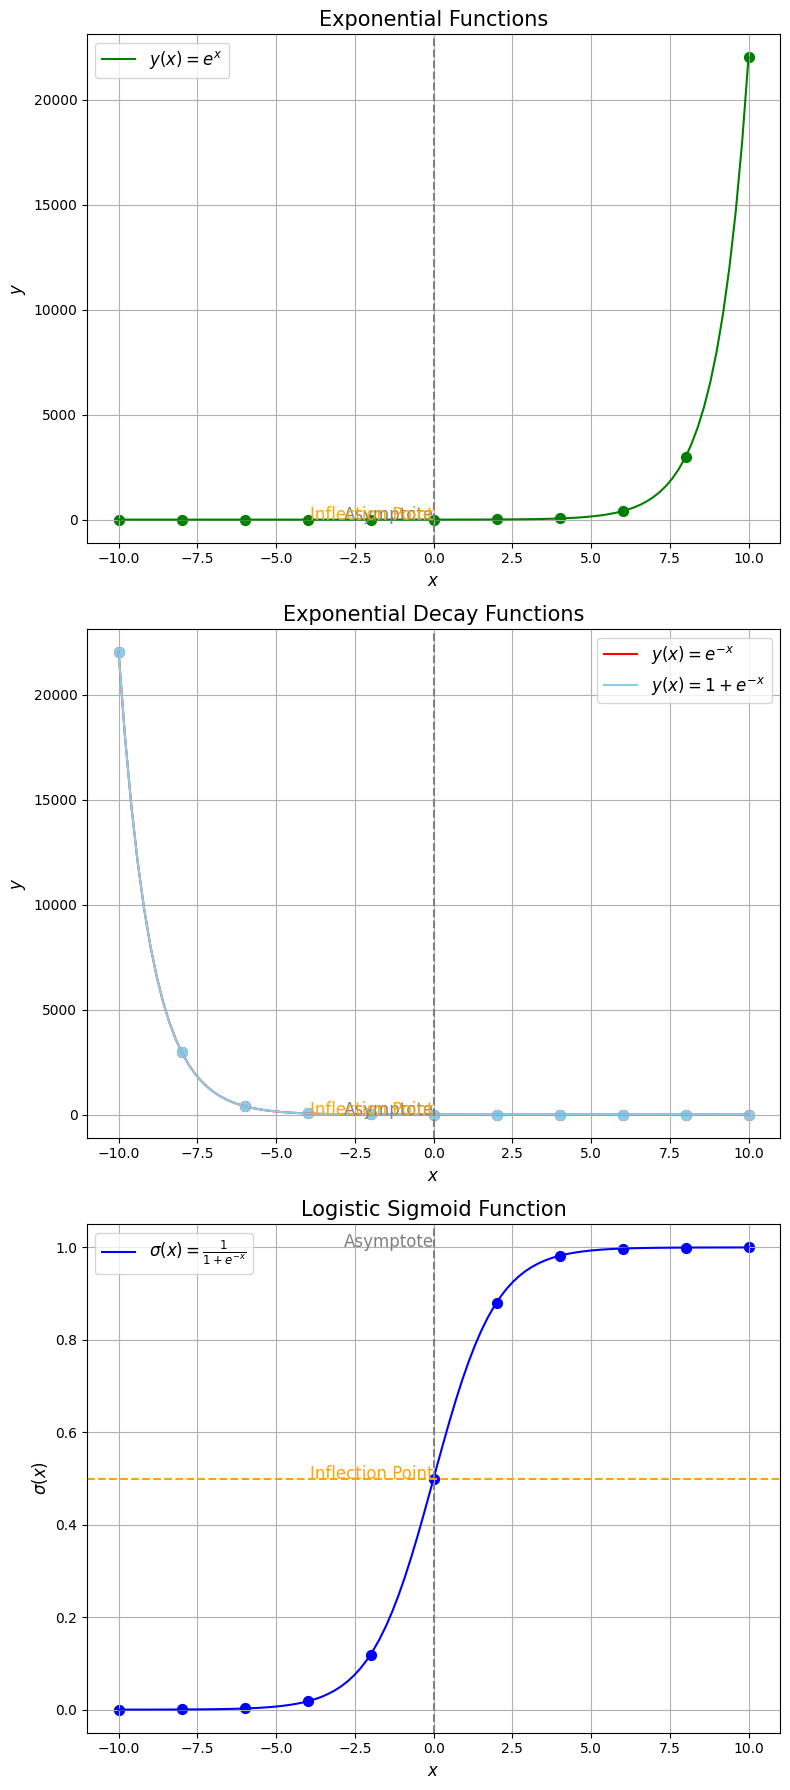


Sigmoid Values:
Sigmoid(-10.000) = 0.0000454
Sigmoid(-8.000) = 0.0003354
Sigmoid(-6.000) = 0.0024726
Sigmoid(-4.000) = 0.0179862
Sigmoid(-2.000) = 0.1192029
Sigmoid(0.000) = 0.5000000
Sigmoid(2.000) = 0.8807971
Sigmoid(4.000) = 0.9820138
Sigmoid(6.000) = 0.9975274
Sigmoid(8.000) = 0.9996646
Sigmoid(10.000) = 0.9999546


In [ ]:

# Define x-axis limits
xlim_min, xlim_max = -10, 10

# Generate x values and points for visualization
X = np.linspace(xlim_min, xlim_max, 100)
X_pts = np.linspace(xlim_min, xlim_max, 11)

# Create a figure and subplot
fig, axs = plt.subplots(3, 1, figsize=(8, 18))

# Plot exponential functions
axs[0].plot(X, np.exp(X), color="green", label="$y(x) = e^{x}$")
axs[0].scatter(X_pts, np.exp(X_pts), color="green", s=50)
axs[0].axvline(x=0, linestyle="dashed", color="gray")
axs[0].legend(loc="best", fontsize=12)
axs[0].set_xlabel("$x$", fontsize=12)
axs[0].set_ylabel("$y$", fontsize=12)
axs[0].set_title("Exponential Functions", fontsize=15)
axs[0].grid(True)

# Plot exponential decay functions
axs[1].plot(X, np.exp(-X), color="red", label="$y(x) = e^{-x}$")
axs[1].scatter(X_pts, np.exp(-X_pts), color="red", s=50)
axs[1].plot(X, 1 + np.exp(-X), color="skyblue", label="$y(x) = 1 + e^{-x}$")
axs[1].scatter(X_pts, 1 + np.exp(-X_pts), color="skyblue", s=50)
axs[1].axvline(x=0, linestyle="dashed", color="gray")
axs[1].legend(loc="best", fontsize=12)
axs[1].set_xlabel("$x$", fontsize=12)
axs[1].set_ylabel("$y$", fontsize=12)
axs[1].set_title("Exponential Decay Functions", fontsize=15)
axs[1].grid(True)

# Plot sigmoid function
axs[2].plot(X, 1 / (1 + np.exp(-X)), color="blue", label="$\sigma(x) = \\frac{1}{1 + e^{-x}}$")
axs[2].scatter(X_pts, 1 / (1 + np.exp(-X_pts)), color="blue", s=50)
axs[2].axvline(x=0, linestyle="dashed", color="gray")
axs[2].axhline(y=0.5, linestyle="dashed", color="orange")
axs[2].legend(loc="best", fontsize=12)
axs[2].set_xlabel("$x$", fontsize=12)
axs[2].set_ylabel("$\sigma(x)$", fontsize=12)
axs[2].set_title("Logistic Sigmoid Function", fontsize=15)
axs[2].grid(True)

# Add annotations
for ax in axs:
    ax.text(0, 1, "Asymptote", color="gray", fontsize=12, ha="right")
    ax.text(0, 0.5, "Inflection Point", color="orange", fontsize=12, ha="right")

plt.tight_layout()
plt.show()

# Print sigmoid values for selected points
print("\nSigmoid Values:")
for x in X_pts:
    print(f"Sigmoid({x:.3f}) = {1 / (1 + np.exp(-x)):.7f}")


## <font color='lightblue'>The Logistic Regression Model</font>

Given input feature variables $x_1, x_2, \ldots, x_n$, the **Logistic Regression Model** can be represented as:
$$z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n$$

The probability of belonging to the positive class is given by the logistic sigmoid function:
$$P(\text{Positive Class}) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n)}}$$

Here, $z$ is a linear combination of the input feature variables and their associated coefficients $\theta_0, \theta_1, \theta_2, \dots, \theta_n$.

The logistic sigmoid function maps the linear combination $z$ to a value between 0 and 1, representing a probability. This output is interpreted as the probability that the instance belongs to the positive class in **binary classification problems**.

Thus, the **Logistic Regression Model** predicts the probability $p = \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n)}}$ of an instance belonging to the positive class.


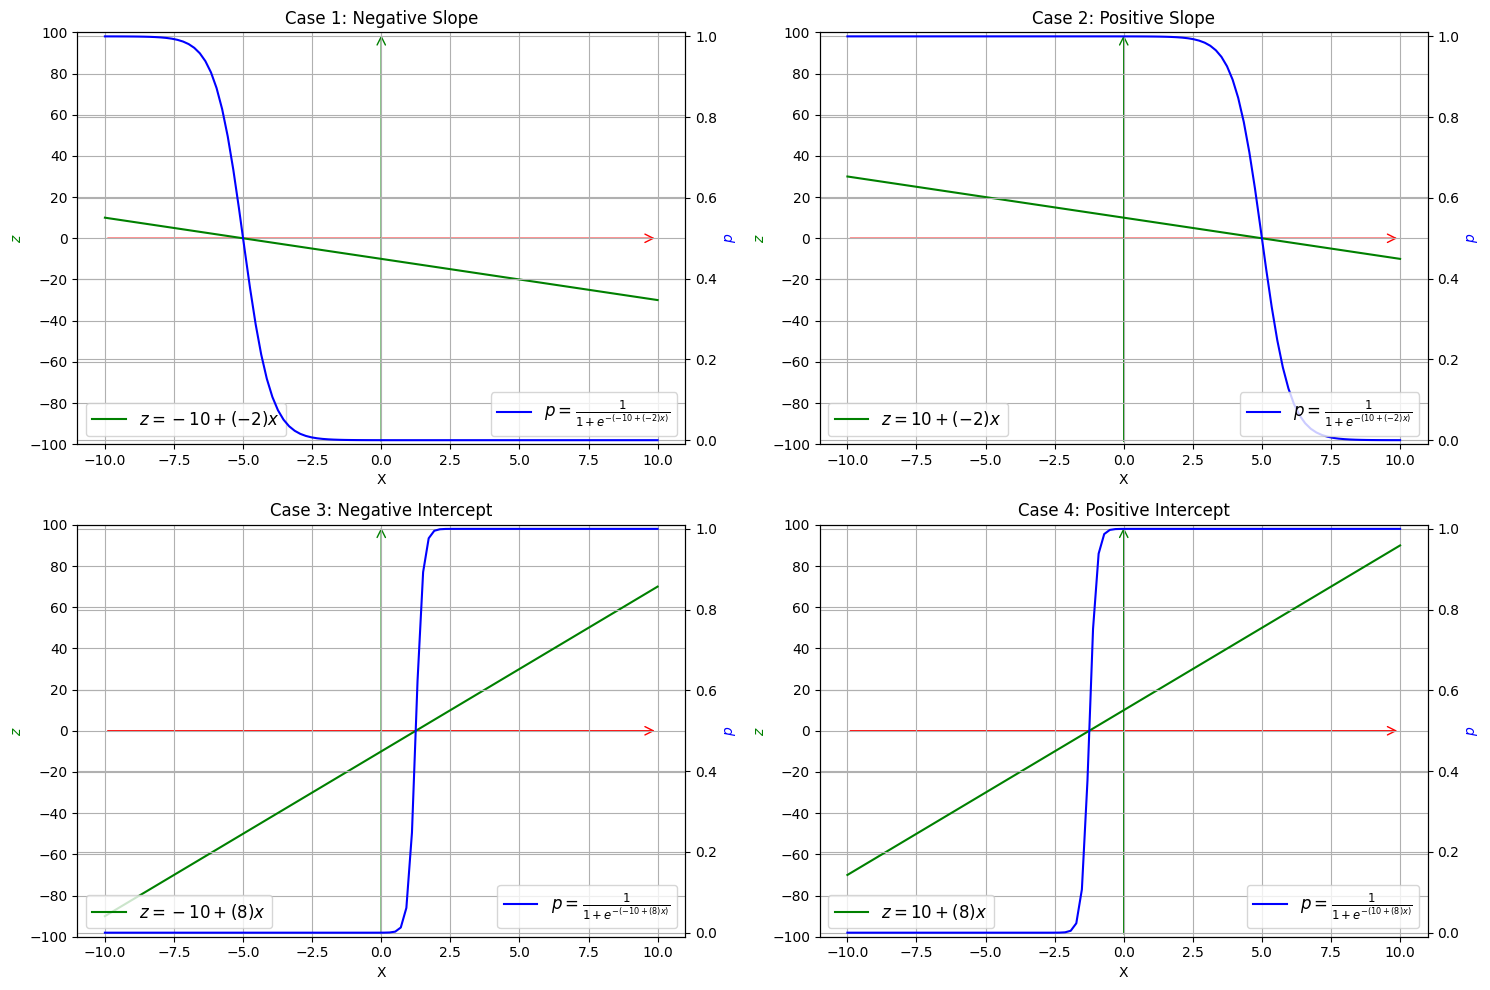

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Define parameters
xlim_min, xlim_max = -10, 10
zlim_min, zlim_max = -100, 100
X = np.linspace(xlim_min, xlim_max, 100)
coef0 = np.array([[-10, 10], [-10, 10]])
coef1 = np.array([[-2, -2], [8, 8]])

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot z and sigmoid function for each set of coefficients
for i, axs_row in enumerate(axs):
    for j, ax1 in enumerate(axs_row):
        Z = coef0[i, j] + coef1[i, j] * X
        ax1.plot(X, Z, color="green", label=f"$z = {coef0[i, j]} + ({coef1[i, j]})x$")
        ax2 = ax1.twinx()
        sigmoid = 1 / (1 + np.exp(-Z))
        ax2.plot(X, sigmoid, color="blue", label=f"$p = \\frac{{1}}{{1 + e^{{-({coef0[i, j]} + ({coef1[i, j]})x)}}}}$")

        # Add arrows
        arrow_x = FancyArrowPatch((xlim_min, 0), (xlim_max, 0), color='red', arrowstyle='->', mutation_scale=15)
        arrow_z = FancyArrowPatch((0, zlim_min), (0, zlim_max), color='green', arrowstyle='->', mutation_scale=15)
        ax1.add_patch(arrow_x)
        ax1.add_patch(arrow_z)

        # Set axis labels and limits
        ax1.set_xlabel('X')
        ax1.set_ylabel('$z$', color='green')
        ax2.set_ylabel('$p$', color='blue')
        ax1.set_ylim(zlim_min, zlim_max)
        ax2.set_ylim(-0.01, 1.01)

        # Increase tick labels
        ax1.locator_params(axis='x', nbins=10)
        ax1.locator_params(axis='y', nbins=10)
        ax2.locator_params(axis='y', nbins=10)

        # Add grid
        ax1.grid(True)
        ax2.grid(True)

        # Add legends
        ax1.legend(fontsize=12, loc="lower left")
        ax2.legend(fontsize=12, loc="lower right")

# Add titles
axs[0, 0].set_title('Case 1: Negative Slope')
axs[0, 1].set_title('Case 2: Positive Slope')
axs[1, 0].set_title('Case 3: Negative Intercept')
axs[1, 1].set_title('Case 4: Positive Intercept')

# Adjust layout
plt.tight_layout()
plt.show()


In the context of logistic regression, the classification decision rule can be succinctly expressed as follows:

\[ y =
\begin{cases}
0 & \text{if } \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1)}} < 0.5 \\
1 & \text{if } \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1)}} \geq 0.5
\end{cases}
\]

This decision rule illustrates how logistic regression assigns class labels based on the calculated probability \(p(y = 1 | x_1)\) for a given input \(x_1\). If the probability is less than 0.5, the model predicts the negative class (\(y = 0\)); otherwise, it predicts the positive class (\(y = 1\)).

This binary classification decision is intuitive and aligns with common practice in logistic regression modeling. By utilizing the logistic sigmoid function, the model effectively separates the classes based on the learned parameters, \(\theta_0\) and \(\theta_1\), albeit in a continuous manner that allows for flexible decision boundaries.


The **decision boundary**, where the probability is equal to 0.5, is determined by the value of $z = \theta_0 + \theta_1 x_1$ where the input is classified as positice class (label $y = 1$) when:

$$ \frac{1}{1 + e^{-z}} \geq \frac{1}{2} $$

$$ 1 + e^{-z} \leq 2 $$

$$ e^{-z} \leq 1 $$

$$ -z \leq 0 $$

$$ z \geq 0 $$

$$ \theta_0 + \theta_1 x_1 \geq 0 $$

The **decision boundary**, where the probability is equal to 0.5 is thus the line:
$$ z = \theta_0 + \theta_1 x_1 = 0 \ \ \ \text{when} \ \ \ p(y = 1 | x_1) = \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1)}} = 0.5 $$

Further observation reveals:

$$ P(\text{Positive Class}) = p(y = 1 | x_1) = p = \frac{1}{1+e^{-z}} $$

$$ \frac{1}{p} - 1 = e^{-z} $$

$$ \frac{1 - p}{p} = \frac{1}{e^z} $$

$$ \frac{p}{1 - p} = e^z $$

$$ log \left( \frac{p}{1 - p} \right) = log( e^z ) $$

$$ log \left( \frac{p}{1 - p} \right) = z \cdot log( e ) = z \cdot 1 = z $$

$$ log \left( \frac{p}{1 - p} \right) = \theta_0 + \theta_1 x_1 $$

since $ z = \theta_0 + \theta_1 x_1 $.

In probability theory, the **odds** of an event happening are defined as the ratio of the probability of the event occurring to the probability of it not occurring, thus if $p$ is the probability of success, then:
$$ odds = \frac{p}{1 - p}$$

For the more general case that involves multiple input features, the **log-odds**, or **logit**, is the **natural logarithm of the odds** as defined by:

$$ \text{log-odds}(p) = \text{logit}(p) = log \left( \frac{p}{1 - p} \right) = z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 \ldots + \theta_n x_n $$

**SUMMARY**

The **decision boundary** is identified at the points where:

$$ p = 1 - p = \frac{1}{2} \rightarrow \frac{p}{1 - p} = 1 \rightarrow \log \left(\frac{p}{1 - p}\right) = 0 $$

$$ \rightarrow \text{logit}(p) = \log \left( \frac{p}{1 - p} \right) = z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n = 0 $$

$$ \rightarrow P(\text{Positive Class}) = p(y = 1 | x_1) = p = \frac{1}{1+e^{-z}}
  = \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n)}} = \frac{1}{2} $$


In [ ]:

def plot_one_feature_logistic_regression_results(
                  X, y, model=None,
                  plot_data_points=True,
                  plot_predicted_points=True,
                  plot_predicted_probability_points=False,
                  plot_predicted_curve=False,
                  plot_logistic_regression_curve=False,
                  plot_logit_line=False,
                  X_new=None,
                  xlim="auto",
                  ylim=(-0.1, 1.1),
                  figure_size=(8, 6),
                  title_font_size=20
                 ):

  plt.figure(figsize=figure_size)

  if xlim == "auto":
    xlim_min, xlim_max = np.min(X), np.max(X)
    dx = (xlim_max - xlim_min) * 0.1
    xlim_min, xlim_max = xlim_min - dx, xlim_max + dx
  else:
    xlim_min, xlim_max = xlim

  plt.xlim(xlim_min, xlim_max)
  plt.locator_params(axis='x', nbins=20)
  plt.locator_params(axis='y', nbins=20)

  x_values = np.linspace(xlim_min, xlim_max, 100)

  ylim_min, ylim_max = ylim
  plt.ylim(ylim_min, ylim_max)
  plt.xlabel('X')
  plt.ylabel('y')

  if plot_data_points:
    plt.scatter(X, y, color="blue", s=50, marker="o", label="Data Points")

  if model is not None:

    if plot_predicted_curve:
      y_values = model.predict(x_values.reshape(-1, 1))
      plt.plot(x_values, y_values, color="green", label="Predicted Curve")

    if plot_logit_line or plot_logistic_regression_curve:
      logit_y_values = model.intercept_ + model.coef_ * x_values

      if plot_logit_line:
        plt.plot(x_values, logit_y_values, color="orange",
                 linestyle='dashdot', label="Logit Line")

      if plot_logistic_regression_curve:
        p_values = model.predict_proba(x_values.reshape(-1, 1))[:, 1]
        plt.plot(x_values, p_values, color="orange",
                 linestyle='dotted', label="Logistic Sigmoid Curve")

      plt.axhline(y=0.5, color="orange", linestyle='dashed')

    if plot_predicted_points:
      y_pred = model.predict(X)
      plt.scatter(X, y_pred, color="green", alpha=0.5, s=70, marker="*",
                  label="Predicted Points")

    if plot_predicted_probability_points:
      p_pred = model.predict_proba(X)[:, 1]
      plt.scatter(X, p_pred, color="orange", alpha=0.5, s=30, marker="o",
                  label="Predicted Probability")

    if X_new is not None:
      y_pred_new = model.predict(X_new)
      plt.scatter(X_new, y_pred_new, color="cyan", alpha=0.9, s=150, marker="*",
                  label="New Predicted Points")

    title_text = f"Logit: $z = {model.intercept_:.3f} + ({model.coef_[0]:.3f}) X$\nSigmoid: $p(y = 1 | X) = \\frac{{1}}{{1 + e^{{-z}}}}$"
    plt.title(title_text, fontsize=title_font_size)

  plt.legend()
  plt.grid(True)

def plot_predicted_results(X, y, model, X_new=None):
  plot_one_feature_logistic_regression_results(
                X, y, model,
                plot_data_points=True,
                plot_predicted_points=True,
                plot_predicted_probability_points=True,
                plot_predicted_curve=True,
                plot_logistic_regression_curve=True,
                plot_logit_line=True,
                X_new=X_new
              )

def plot_points(X, y):
  plot_one_feature_logistic_regression_results(X, y, model=None, plot_data_points=True)



In [ ]:


def plot_confusion_matrix(confusion_matrix,
                          class_names=None,
                          figure_size=(8, 6),
                          title_font_size=15,
                          font_size=12):

    num_classes = confusion_matrix.shape[0]
    if class_names is None:
        class_names = np.arange(num_classes)

    fig, ax = plt.subplots(figsize=figure_size)

    # Create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix),
                annot=True, cmap="YlGnBu", fmt='g',
                xticklabels=class_names, yticklabels=class_names)

    ax.xaxis.set_label_position("top")
    plt.tight_layout()

    plt.title('Confusion Matrix', y=1.1, fontsize=title_font_size)
    plt.ylabel('Actual Labels', fontsize=font_size)
    plt.xlabel('Predicted Labels', fontsize=font_size)




## <font color='lightblue'>Variants of Logistic Regression</font>

### 1. Binary Logistic Regression
- **Description:** Binary logistic regression predicts the likelihood of an observation belonging to one of two outcomes (typically labeled as 0 or 1).
- **Example:** An application could predict whether an email is categorized as spam (1) or not spam (0).

### 2. Multiclass Logistic Regression
- **Description:** Multiclass logistic regression expands upon binary logistic regression to accommodate multiple classes, allowing for the prediction of outcomes across several categories.
- **Also Known As:** Multinomial Logistic Regression.
- **Example:** Predicting the genre of a movie among various categories such as Action, Drama, or Comedy.

### 3. Single-Predictor Logistic Regression
- **Description:** This form of logistic regression involves a solitary independent variable used to predict binary outcomes.
- **Example:** Predicting whether a student will pass or fail an exam based solely on the number of hours they studied.

### 4. Multiple Logistic Regression
- **Description:** Multiple logistic regression incorporates several independent variables to predict binary outcomes.
- **Example:** Predicting the likelihood of loan approval based on factors such as income, credit score, and age.

### Key Insights
- **Binary vs. Multiclass:** Consider the number of potential outcomes when choosing between binary and multiclass logistic regression.
- **Single vs. Multiple Predictors:** Assess whether a single predictor or multiple predictors are more suitable for the predictive task at hand.

## <font color='lightblue'>Single-Predictor Binary Logistic Regression</font>

**Single-Predictor Logistic Regression** refers to logistic regression with a single **independent variable**, sometimes also known as:
- One-Predictor Binary Logistic Regression
- Single-Variable Binary Logistic Regression
- One-Variable Binary Logistic Regression
- Univariate Binary Logistic Regression

**Binary Logistic Regression** refers to logistic regression with an outcome variable (**dependent variable**) being binary, meaning it can take one of two values (usually coded as $0$ and $1$).

#### <font color='lightgreen'>Single-Predictor Binary Logistic Regression Model</font>

In the context of single-predictor binary logistic regression, we begin with a $m \times 1$ input data matrix $\mathbf{X}$, where each $x^{(i)}$ represents a feature or predictor. The corresponding dependent variable vector $\mathbf{y}$ contains the binary labels for each observation.

The primary goal is to determine the optimal parameters $\theta_0$ and $\theta_1$ for our model. These parameters define the linear relationship between the predictor variable $x^{(i)}$ and the log-odds of the event being in the positive class.

The model computes the log-odds $z^{(i)}$ for each observation using the equation:

$$ z^{(i)} = \theta_0 + \theta_1 x^{(i)} \quad \text{for } i = 1, 2, \ldots, m.$$

From the log-odds, we derive the probability $p(y^{(i)} = 1 | x^{(i)})$ of an observation belonging to the positive class using the sigmoid function:

$$ p(y^{(i)} = 1 | x^{(i)}) = \frac{1}{1+e^{-(z^{(i)})}} \quad \text{for } i = 1, 2, \ldots, m.$$

This probability represents the likelihood of the event occurring given the predictor variable $x^{(i)}$.

To make predictions, we classify an observation as the positive class ($y^{(i)} = 1$) if the predicted probability $p(y^{(i)} = 1 | x^{(i)})$ is greater than or equal to 0.5. Formally, this is expressed as:

$$\hat{y}^{(i)} =
\begin{cases}
  0 & \text{if } \frac{1}{1+e^{-(\theta_0 + \theta_1 x^{(i)})}} < 0.5, \\
  1 & \text{if } \frac{1}{1+e^{-(\theta_0 + \theta_1 x^{(i)})}} \geq 0.5
\end{cases} \quad \text{for } i = 1, 2, \ldots, m.$$

This decision rule effectively assigns predicted labels based on the computed probabilities.

The logistic regression model optimizes the parameters $\theta_0$ and $\theta_1$ to minimize a cost function, ensuring the model provides the best fit to the data. The specifics of the cost function will be discussed later in the analysis.

### <font color='lightyellow'>Single-Predictor Binary Logistic Regression With `scikit-learn`: Example 1</font>

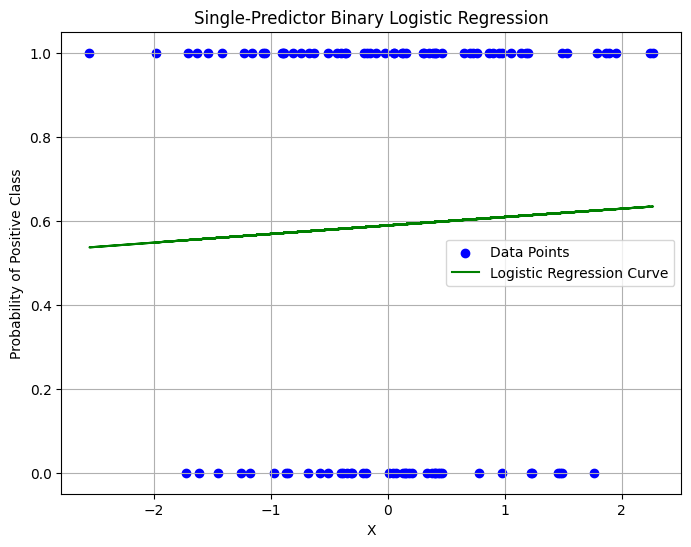

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Generate sample data
np.random.seed(0)
X = np.random.normal(0, 1, (100, 1))  # Single predictor variable
y = np.random.randint(0, 2, 100)       # Binary labels

# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Plot data points and logistic regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict_proba(X)[:,1], color='green', label='Logistic Regression Curve')
plt.xlabel('X')
plt.ylabel('Probability of Positive Class')
plt.title('Single-Predictor Binary Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


#### <font color='lightgreen'>Create and Fitting the Model Using `scikit-learn` </font>


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.855


#### <font color='lightgreen'>Confusion Matrix, Precision, Recall & $F_1$- Score</font>

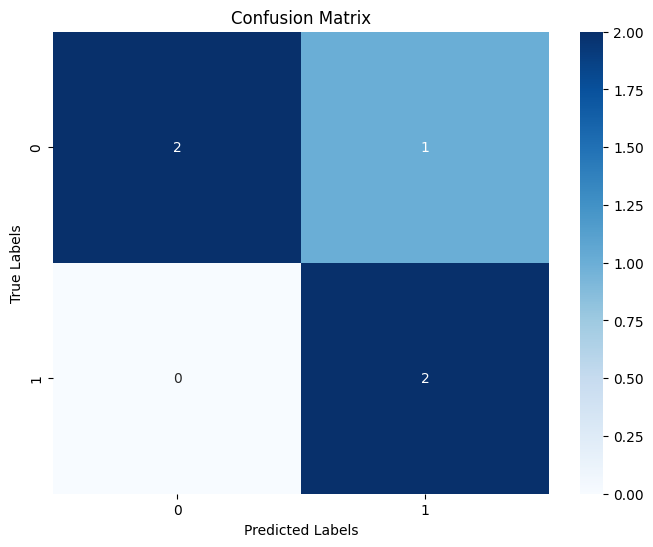

In [ ]:


def plot_confusion_matrix(confusion_matrix, cmap='Blues'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap=cmap)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming y_true and y_pred are your actual true labels and predicted labels
y_true = [0, 1, 0, 1, 0]
y_pred = [0, 1, 1, 1, 0]

# Compute confusion matrix
c_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix with a default color map (Blues)
plot_confusion_matrix(c_matrix)


In [ ]:


# Assuming y_true and y_pred are your actual true labels and predicted labels
y_true = [0, 1, 0, 1, 0]
y_pred = [0, 1, 1, 1, 0]

# Generate classification report
report = classification_report(y_true, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



Given:

$tp = \text{True Positive = Correct Result} $  
$fp = \text{False Positive = Unexpected Result (predicted but not observed)} $  
$fn = \text{False Negative = Missing Result (not predicted but observed)} $  

**Precision:**
- Precision is the ratio of correctly predicted positive observations to the total predicted positives.
- It measures the accuracy of the positive predictions made by the model.
- A high precision indicates that when the model predicts a positive class, it is likely to be correct.
- **Precision is more critical where false positives are costly, example in spam email detection.**
- Formula: $ precision = \frac{tp}{tp + fp} $

**Recall** (Sometimes it is called **Sensitivity**):
- Recall is the ratio of correctly predicted positive observations to the total actual positives.
- It measures the ability of the model to capture all the positive instances in the dataset.
- A high recall indicates that the model is good at finding all the positive instances in the dataset.
- **Recall is more critical where false negatives are costly, example in fraud detection**
- Formula: $ recall = \frac{tp}{tp + fn} $

**F1-score**
- The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, considering both false positives and false negatives.
- It ranges from $0$ to $1$, where:
  - $1$ indicates perfect precision and recall,
  - $0$ indicates poor performance.
- It is particularly useful when there is an imbalance between the classes in the dataset. It penalizes models that favor one metric over the other.
- Formula: $ F_1 = \frac{2 \ \text{x} \  precision \ \text{x} \ recall}{precision \ + \ recall} $

**Support**
- Support represents the number of actual occurrences of each class in the specified dataset.
- It is the count of true instances for each class.
- It helps in understanding the distribution of classes in the dataset.

Reference: https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics


In [ ]:
def my_precision_recall_fscore_support(confusion_matrix):
    num_class = confusion_matrix.shape[0]
    support = np.sum(confusion_matrix, axis=1)
    pred = np.sum(confusion_matrix, axis=0)
    tp = np.diag(confusion_matrix)
    fp = pred - tp
    fn = support - tp
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)

    return precision, recall, f1_score, support

def my_classification_report(y, y_pred, target_names=None):
    c_matrix = confusion_matrix(y, y_pred)
    num_class = c_matrix.shape[0]
    precision, recall, f1_score, support = my_precision_recall_fscore_support(c_matrix)

    if target_names is None:
        spaces_string = " " * 14
    else:
        max_length = max(len(name) for name in target_names)
        spaces_string = " " * (max_length + 2)

    report_str = f"{spaces_string}precision    recall  f1-score   support\n\n"

    for i in range(num_class):
        if target_names is None:
            report_str += f"%12d  " % i
        else:
            report_str += f"%{max_length}s  " % target_names[i]

        report_str += "%9.2f%10.2f%10.2f%10d\n" % (precision[i], recall[i], f1_score[i], support[i])

    return report_str




In [ ]:
# Example usage
y_true = [0, 1, 0, 1, 0]
y_pred = [0, 1, 1, 1, 0]
report = my_classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

         precision    recall  f1-score   support

Class 0       1.00      0.67      0.80         3
Class 1       0.67      1.00      0.80         2



#### <font color='lightgreen'>Predict New Data Points</font>

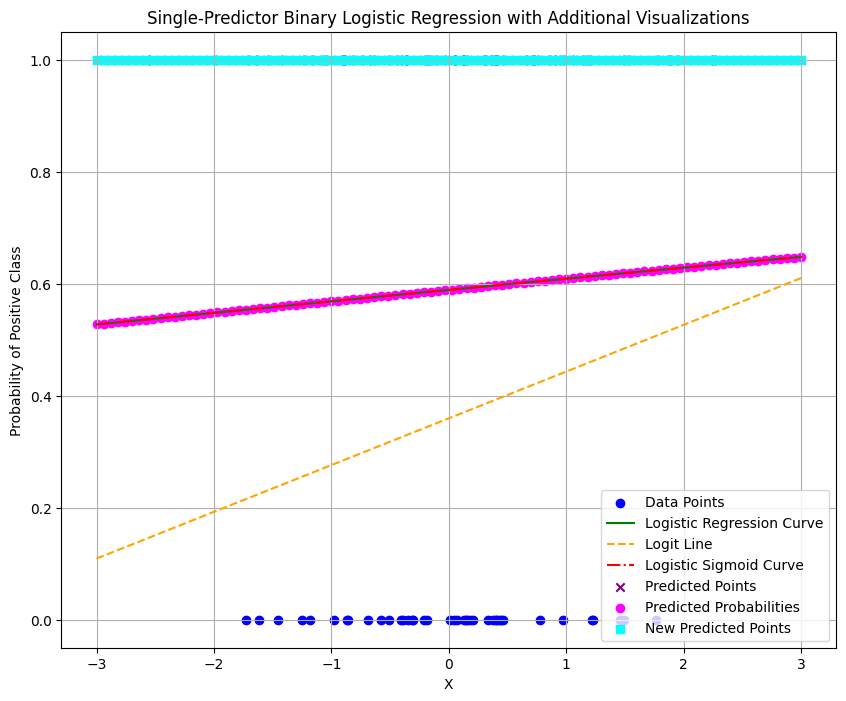

In [ ]:

# Generate sample data
np.random.seed(0)
X = np.random.normal(0, 1, (100, 1))  # Single predictor variable
y = np.random.randint(0, 2, 100)       # Binary labels

# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict new data points
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = model.predict(X_new)
probabilities = model.predict_proba(X_new)[:, 1]

# Plot data points, logistic regression curve, and additional visualizations
plt.figure(figsize=(10, 8))

# Data points
plt.scatter(X, y, color='blue', label='Data Points')

# Logistic regression curve
plt.plot(X_new, probabilities, color='green', label='Logistic Regression Curve')

# Logit line
logit_line = model.intercept_ + model.coef_ * X_new
plt.plot(X_new, logit_line, color='orange', linestyle='--', label='Logit Line')

# Logistic sigmoid curve
logistic_sigmoid = 1 / (1 + np.exp(-logit_line))
plt.plot(X_new, logistic_sigmoid, color='red', linestyle='-.', label='Logistic Sigmoid Curve')

# Predicted points
plt.scatter(X_new, y_pred, color='purple', label='Predicted Points', marker='x')

# Predicted probability points
plt.scatter(X_new, probabilities, color='magenta', label='Predicted Probabilities', marker='o')

# New predicted points
plt.scatter(X_new, y_pred, color='cyan', label='New Predicted Points', marker='s')

plt.xlabel('X')
plt.ylabel('Probability of Positive Class')
plt.title('Single-Predictor Binary Logistic Regression with Additional Visualizations')
plt.legend()
plt.grid(True)
plt.show()


#### <font color='lightgreen'>Improve the Model</font>

- Set regularization strength C equal to 10.0, instead of the default value of 1.0:

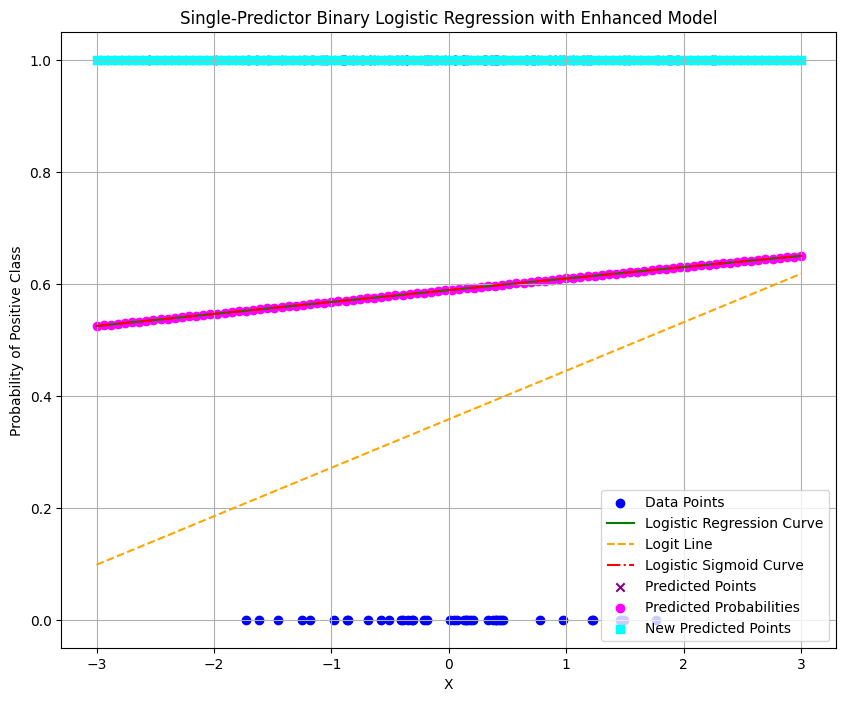

In [ ]:
# Generate sample data
np.random.seed(0)
X = np.random.normal(0, 1, (100, 1))  # Single predictor variable
y = np.random.randint(0, 2, 100)       # Binary labels

# Fit logistic regression model with specified regularization strength and solver
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X, y)

# Predict new data points
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = model.predict(X_new)
probabilities = model.predict_proba(X_new)[:, 1]

# Plot data points, logistic regression curve, and additional visualizations
plt.figure(figsize=(10, 8))

# Data points
plt.scatter(X, y, color='blue', label='Data Points')

# Logistic regression curve
plt.plot(X_new, probabilities, color='green', label='Logistic Regression Curve')

# Logit line
logit_line = model.intercept_ + model.coef_ * X_new
plt.plot(X_new, logit_line, color='orange', linestyle='--', label='Logit Line')

# Logistic sigmoid curve
logistic_sigmoid = 1 / (1 + np.exp(-logit_line))
plt.plot(X_new, logistic_sigmoid, color='red', linestyle='-.', label='Logistic Sigmoid Curve')

# Predicted points
plt.scatter(X_new, y_pred, color='purple', label='Predicted Points', marker='x')

# Predicted probability points
plt.scatter(X_new, probabilities, color='magenta', label='Predicted Probabilities', marker='o')

# New predicted points
plt.scatter(X_new, y_pred, color='cyan', label='New Predicted Points', marker='s')

plt.xlabel('X')
plt.ylabel('Probability of Positive Class')
plt.title('Single-Predictor Binary Logistic Regression with Enhanced Model')
plt.legend()
plt.grid(True)
plt.show()


### <font color='lightyellow'>Binary Logistic Regression With `scikit-learn`: Example 2</font>

In [ ]:
# Sample data
X = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 8.5, 9]).reshape((-1, 1))
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

# Create and fit logistic regression model
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X, y)

# Mean accuracy
mean_accuracy = model.score(X, y)
print(f"Mean accuracy: {mean_accuracy}")

# Predicted labels
y_pred = model.predict(X)
print(f"Predicted labels: {y_pred}")

# Calculate mean accuracy manually
mean_accuracy_eq = np.sum(y == y_pred) / len(y)
print(f"Mean accuracy calculated manually: {mean_accuracy_eq}")

# Model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

# Classes
print(f"Classes: {model.classes_}")

# Predicted probabilities
p_pred = model.predict_proba(X)
print(f"Predicted probabilities: {p_pred}")

# Compute probabilities using the logistic function directly
logit_values = model.intercept_ + model.coef_ * X
p_pred_eq = 1 / (1 + np.exp(-logit_values))
p_pred_eq = np.append(1 - p_pred_eq, p_pred_eq, axis=1)
print(f"Predicted probabilities using logistic function: {p_pred_eq}")


Mean accuracy: 0.8
Predicted labels: [0 0 0 1 1 1 1 1 1 1]
Mean accuracy calculated manually: 0.8
Intercept: [-1.3683015]
Coefficients: [[1.27276582]]
Classes: [0 1]
Predicted probabilities: [[7.97105597e-01 2.02894403e-01]
 [6.75226153e-01 3.24773847e-01]
 [5.23865772e-01 4.76134228e-01]
 [3.67990518e-01 6.32009482e-01]
 [2.35550591e-01 7.64449409e-01]
 [1.40202023e-01 8.59797977e-01]
 [7.94388450e-02 9.20561155e-01]
 [4.36726232e-02 9.56327377e-01]
 [7.86670137e-05 9.99921333e-01]
 [4.16323727e-05 9.99958368e-01]]
Predicted probabilities using logistic function: [[7.97105597e-01 2.02894403e-01]
 [6.75226153e-01 3.24773847e-01]
 [5.23865772e-01 4.76134228e-01]
 [3.67990518e-01 6.32009482e-01]
 [2.35550591e-01 7.64449409e-01]
 [1.40202023e-01 8.59797977e-01]
 [7.94388450e-02 9.20561155e-01]
 [4.36726232e-02 9.56327377e-01]
 [7.86670137e-05 9.99921333e-01]
 [4.16323727e-05 9.99958368e-01]]


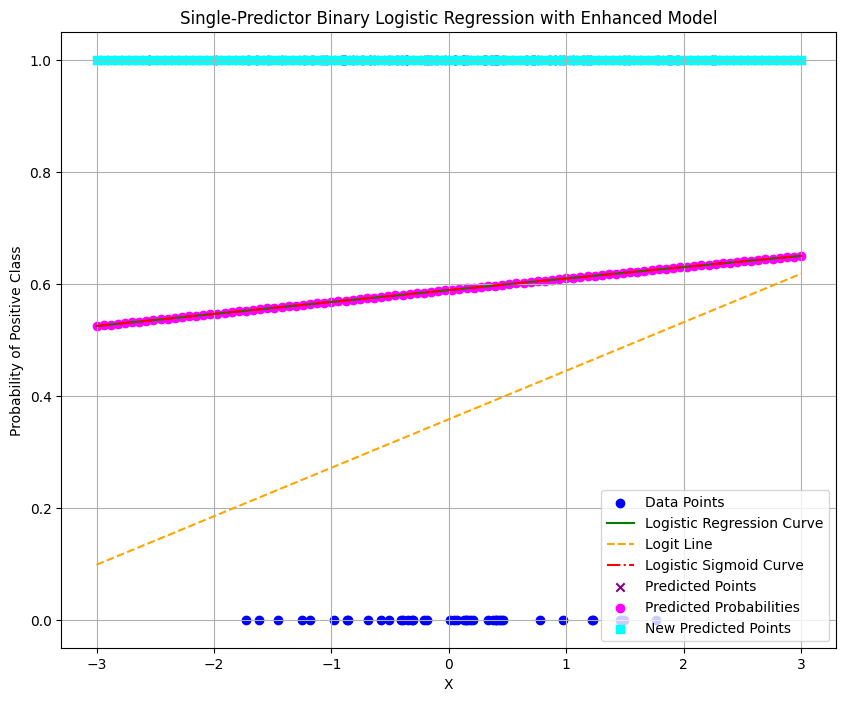

In [ ]:
# Generate sample data
np.random.seed(0)
X = np.random.normal(0, 1, (100, 1))  # Single predictor variable
y = np.random.randint(0, 2, 100)       # Binary labels

# Fit logistic regression model with specified regularization strength and solver
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X, y)

# Predict new data points
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = model.predict(X_new)
probabilities = model.predict_proba(X_new)[:, 1]

# Plot data points, logistic regression curve, and additional visualizations
plt.figure(figsize=(10, 8))

# Data points
plt.scatter(X, y, color='blue', label='Data Points')

# Logistic regression curve
plt.plot(X_new, probabilities, color='green', label='Logistic Regression Curve')

# Logit line
logit_line = model.intercept_ + model.coef_ * X_new
plt.plot(X_new, logit_line, color='orange', linestyle='--', label='Logit Line')

# Logistic sigmoid curve
logistic_sigmoid = 1 / (1 + np.exp(-logit_line))
plt.plot(X_new, logistic_sigmoid, color='red', linestyle='-.', label='Logistic Sigmoid Curve')

# Predicted points
plt.scatter(X_new, y_pred, color='purple', label='Predicted Points', marker='x')

# Predicted probability points
plt.scatter(X_new, probabilities, color='magenta', label='Predicted Probabilities', marker='o')

# New predicted points
plt.scatter(X_new, y_pred, color='cyan', label='New Predicted Points', marker='s')

plt.xlabel('X')
plt.ylabel('Probability of Positive Class')
plt.title('Single-Predictor Binary Logistic Regression with Enhanced Model')
plt.legend()
plt.grid(True)
plt.show()

Confusion matrix:
[[2 1]
 [0 2]]


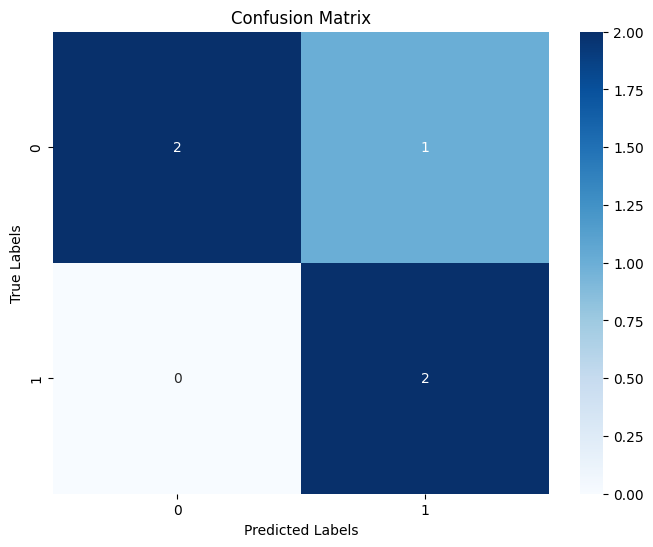

In [ ]:

y = [0, 1, 0, 1, 0]
y_pred = [0, 1, 1, 1, 0]

# Compute confusion matrix
c_matrix = confusion_matrix(y, y_pred)
print("Confusion matrix:")
print(c_matrix)

# Plot confusion matrix
plot_confusion_matrix(c_matrix)


In [ ]:
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [ ]:
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



## <font color='lightblue'>Multiple-Predictor Binary Logistic Regression</font>

**Multiple-Predictor Logistic Regression** refers to logistic regression with multiple **independent variable**, sometimes it is also known as:
- Multiple Binary Logistic Regression
- Multiple Logistic Regression for Binary Classification
- Multiple Binary Logistic Regression
- Multiple Binary Logistic Regression with Multiple Predictors

**Binary Logistic Regression** refers to logistic regression with an outcome variable (**dependent variable**) being binary, meaning it can take one of two values (usually coded as $0$ and $1$).

#### <font color='lightgreen'>Create and Fitting Multiple-Predictor Binary Logistic Regression</font>

Consider a $m \times n$ input data matrix $\mathbf{X}$ for our independent variables (also known as features or predictors) and $\mathbf{y}$ for our dependent variable containing the label values:

$$
\mathbf{X} =
  \begin{bmatrix}
    x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
    x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
    \vdots    & \vdots    & \ddots & \vdots    \\
    x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}
  \end{bmatrix}, \ \ \ \
\mathbf{y} =
  \begin{bmatrix}
    y^{(1)} \\
    y^{(2)} \\
    \vdots \\
    y^{(m)}
  \end{bmatrix}
$$
<br>

Here, $m$ represents the data size (number of points = number of observations), and the $n$ represents the data dimension (number of features).

Each element $y^{(i)}$ in $\mathbf{y}$ typically contains the integer value of $1$ to represent the **positive class**, and $0$ otherwise.
<br>

The **Multiple-Predictor Binary Logistic Regression** aims to fit the input data ($\mathbf{X}$) to obtain the **best-fit** model parameters $\theta_0, \theta_1, \ldots, \theta_n $ leading to:

$$ z^{(1)} = \theta_0 + \theta_1 x_1^{(1)} + \theta_2 x_2^{(1)} + \ldots + \theta_n x_n^{(1)} $$
$$ z^{(2)} = \theta_0 + \theta_1 x_1^{(2)} + \theta_2 x_2^{(2)} + \ldots + \theta_n x_n^{(2)} $$
$$ \vdots $$
$$ z^{(m)} = \theta_0 + \theta_1 x_1^{(m)} + \theta_2 x_2^{(m)} + \ldots + \theta_n x_n^{(m)} $$

If we define vector $\mathbf{z}$ and $\mathbf{\theta}$, and rewrite $\mathbf{X}$ by augmenting an extra column of ones in the first column (the new $\mathbf{\theta}$ is often called **Augmented Data Matrix** , we have

$$
\mathbf{z} =
  \begin{bmatrix}
    z^{(1)} \\
    z^{(2)} \\
    \vdots \\
    z^{(m)}
  \end{bmatrix}, \ \ \ \
\mathbf{X} =
  \begin{bmatrix}
    1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
    1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
    \vdots & \vdots    & \vdots    & \ddots & \vdots    \\
    1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}
  \end{bmatrix}, \ \ \ \
\mathbf{\theta} =
  \begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    \theta_2 \\
    \vdots \\
    \theta_n
  \end{bmatrix}
$$

we get
$$
\mathbf{z} =
  \begin{bmatrix}
    z^{(1)} \\
    z^{(2)} \\
    \vdots \\
    z^{(m)}
  \end{bmatrix} =
  \begin{bmatrix}
    \theta_0 + \theta_1 x_1^{(1)} + \theta_2 x_2^{(1)} + \ldots + \theta_n x_n^{(1)} \\
    \theta_0 + \theta_1 x_1^{(2)} + \theta_2 x_2^{(2)} + \ldots + \theta_n x_n^{(2)} \\
    \vdots \\
    \theta_0 + \theta_1 x_1^{(m)} + \theta_2 x_2^{(m)} + \ldots + \theta_n x_n^{(m)} \\
  \end{bmatrix} =
  \begin{bmatrix}
    1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
    1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
    \vdots & \vdots    & \vdots    & \ddots & \vdots  \\
    1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}
  \end{bmatrix}
  \begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    \theta_2 \\
    \vdots \\
    \theta_n
  \end{bmatrix}
$$
<br>

$$ \mathbf{z} = \mathbf{X} \mathbf{\theta} $$
<br>

To predict the label
$$ p(y^{(i)} = 1 | x_1^{(i)}, x_2^{(i)}, \ldots, x_n^{(i)}) = \frac{1}{1+e^{-(z^{(i)})}}   \ \ \ \ \ \text{for } i = 1, 2, \ldots, m. $$

$$ p(y^{(i)} = 1 | x_1^{(i)}, x_2^{(i)}, \ldots, x_n^{(i)}) = \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + \ldots + \theta_n x_n^{(i)}) }}   \ \ \ \ \ \text{for } i = 1, 2, \ldots, m. $$
<br>

This can be written more compactly as
$$ \mathbf{p}( \mathbf{y} = 1 | \mathbf{X} ) = \frac{1}{1+e^{-\mathbf{X}\mathbf{\theta} }}$$
<br>

It is customary to classify an input instance as the positive class (usually labeled as $y = 1$) if $p(y^{(i)} = 1 | x_1^{(i)}, x_1^{(i)}, \ldots, x_n^{(i)}) \geq 0.5$. Consequently, the predicted label $\hat{y}^{(i)}$ is determined as follows:

$$\hat{y}^{(i)} =
\begin{cases}
  0 & \text{if } \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + \ldots + \theta_n x_n^{(i)})}} < 0.5, \\
  1 & \text{if } \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + \ldots + \theta_n x_n^{(i)})}} \geq 0.5.
\end{cases}  \ \ \ \ \ \text{for } i = 1, 2, \ldots, m. $$

The above expression is commonly denoted using an **indicator function**
$$ \hat{y}^{(i)} = 1 \left( \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + \ldots + \theta_n x_n^{(i)}) }} \geq 0.5
 \right)  \ \ \ \ \ \text{for } i = 1, 2, \ldots, m.
$$
<br>

The predicted label vector is thus as:
$$
\mathbf{\hat{y}} =
  \begin{bmatrix}
    \hat{y}^{(1)} \\
    \hat{y}^{(2)} \\
    \vdots \\
    \hat{y}^{(m)}
  \end{bmatrix}
$$

$$
\mathbf{\hat{y}} = 1 \left( \frac{1}{1+e^{-\mathbf{X}\mathbf{\theta} }} \geq 0.5 \right)
$$
<br>

The logistic regression model aims to find the optimal values for the parameters $ \theta_0, \theta_1, \ldots, \theta_n $ that minimize the **cost function** and provide the **best fit** for the data. Further discussion on the cost function will be presented later.

#### <font color='lightgreen'>The Data</font>

In [ ]:

X = np.array([[5, 35], [10, 50], [25, 50], [40, 15], [25, 90],
              [40, 40], [75, 75], [80, 15], [90, 60], [100, 40]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Print the input features and target labels
print("Input features (X):")
print(X)
print("\nTarget labels (y):")
print(y)

# Print the shape of input features and target labels
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)


Input features (X):
[[  5  35]
 [ 10  50]
 [ 25  50]
 [ 40  15]
 [ 25  90]
 [ 40  40]
 [ 75  75]
 [ 80  15]
 [ 90  60]
 [100  40]]

Target labels (y):
[0 0 0 0 0 1 1 1 1 1]

Shape of X: (10, 2)
Shape of y: (10,)


In [ ]:
model = LogisticRegression(solver = 'liblinear', C = 20, random_state = 42,
                           tol = 1e-10, max_iter = 1000)

# TO DO: Try C = 30
# model = LogisticRegression(solver = 'liblinear', C = 30, random_state = 42,
#                            tol = 1e-10, max_iter = 1000)

model.fit(X, y)

LogisticRegression(C=20, max_iter=1000, random_state=42, solver='liblinear',
                   tol=1e-10)

In [ ]:
mean_accuracy = model.score(X, y)
print(f"mean_accuracy = {mean_accuracy}")

print(f"y = {y}")

y_pred = model.predict(X)
print(f"y_pred = {y_pred}")

mean_accuracy_eq = np.sum(y == y_pred) / len(y)
print(mean_accuracy_eq)

mean_accuracy = 0.8
y = [0 0 0 0 0 1 1 1 1 1]
y_pred = [0 0 0 1 0 0 1 1 1 1]
0.8


In [ ]:
print(f"n_iter_ = {model.n_iter_}")
print(f"intercept_ = {model.intercept_}")
print(f"coefficient_ = {model.coef_}")

print(model.classes_)

p_pred = model.predict_proba(X)
print(p_pred)

# Compute probability using equation
# NOTE: we need to sum up over the 2 features using np.sum()
logit_y_values = model.intercept_ + np.sum(model.coef_ * X, axis = 1).reshape((-1, 1))
p_pred_eq = 1 / (1 + np.exp(-logit_y_values))
p_pred_eq = np.append(1 - p_pred_eq, p_pred_eq, axis = 1)
print(p_pred_eq)

print(np.abs(p_pred - p_pred_eq) < 0.0000001)

n_iter_ = [13]
intercept_ = [-3.93329741]
coefficient_ = [[ 0.10399613 -0.01006136]]
[0 1]
[[0.97736725 0.02263275]
 [0.96759197 0.03240803]
 [0.86252976 0.13747024]
 [0.48110212 0.51889788]
 [0.90369021 0.09630979]
 [0.54386358 0.45613642]
 [0.0426227  0.9573773 ]
 [0.01426649 0.98573351]
 [0.00798104 0.99201896]
 [0.00232001 0.99767999]]
[[0.97736725 0.02263275]
 [0.96759197 0.03240803]
 [0.86252976 0.13747024]
 [0.48110212 0.51889788]
 [0.90369021 0.09630979]
 [0.54386358 0.45613642]
 [0.0426227  0.9573773 ]
 [0.01426649 0.98573351]
 [0.00798104 0.99201896]
 [0.00232001 0.99767999]]
[[ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]]


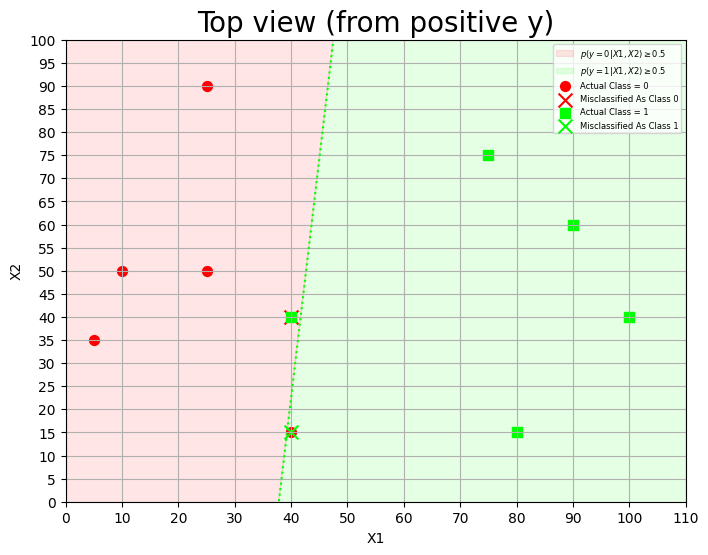

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap

def get_logit_X2(coef0, coef1, coef2, X1, y):
    return (y - coef0 - coef1 * X1) / coef2

def getY(X1, X2):
    array = np.array([X1, X2]).reshape(1, -1)
    return model.predict(array)[0]

def plot_logistic_regression_top_view(X, y, model,
                                      xlim="auto", ylim="auto",
                                      figure_size=(8, 6),
                                      plot_logit_line=True,
                                      plot_logit_region=True,
                                      plot_classes_all_points=True,
                                      X_new=None):
    plt.figure(figsize=figure_size)

    # Define colors and markers
    colors = [(1, 0, 0), (0, 1, 0)]  # Red, Green
    markers = ["o", "s"]
    num_classes = model.classes_.size

    # Define colormap for better visualization
    my_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=num_classes)

    # Set plot limits
    if xlim == "auto":
        xlim_min, xlim_max = np.min(X[:, 0]), np.max(X[:, 0])
        dx = (xlim_max - xlim_min) * 0.1
    else:
        xlim_min, xlim_max = xlim
        dx = 0

    if ylim == "auto":
        ylim_min, ylim_max = np.min(X[:, 1]), np.max(X[:, 1])
        dy = (ylim_max - ylim_min) * 0.1
    else:
        ylim_min, ylim_max = ylim
        dy = 0

    xlim_min -= dx
    xlim_max += dx
    ylim_min -= dy
    ylim_max += dy

    plt.xlim(xlim_min, xlim_max)
    plt.ylim(ylim_min, ylim_max)
    plt.locator_params(axis='x', nbins=20)
    plt.locator_params(axis='y', nbins=20)
    plt.xlabel('X1')
    plt.ylabel('X2')

    # Get coefficients
    coef0 = model.intercept_
    coef1 = model.coef_[:, 0]
    coef2 = model.coef_[:, 1]

    # Generate X1 values for plotting
    logit_X1 = np.linspace(xlim_min, xlim_max, 100).reshape(-1, 1)
    logit_X1 = logit_X1.reshape(-1)

    # Calculate corresponding X2 values for decision boundary
    logit_X2_y0 = get_logit_X2(coef0, coef1, coef2, logit_X1, y=0)
    logit_X2_y1000 = get_logit_X2(coef0, coef1, coef2, logit_X1, y=1000)
    logit_X2_yNegative1000 = get_logit_X2(coef0, coef1, coef2, logit_X1, y=-1000)

    # Plot decision boundary and regions
    if num_classes == 2:
        plt.fill_between(logit_X1, logit_X2_y0, logit_X2_yNegative1000,
                         color=colors[0], alpha=0.1, label="$p(y = 0 | X1, X2) \geq 0.5$")
        plt.fill_between(logit_X1, logit_X2_y0, logit_X2_y1000,
                         color=colors[1], alpha=0.1, label="$p(y = 1 | X1, X2) \geq 0.5$")
        plt.plot(logit_X1, logit_X2_y0, linestyle='dotted', color=colors[1])
    else:
        if plot_logit_region:
            for i in range(num_classes):
                plt.fill_between(logit_X1, logit_X2_y0[:, i], logit_X2_y1000[:, i],
                                 color=colors[i], alpha=0.1, label=f"$p(y = {i} | X1, X2) \geq 0.5$")
        if plot_logit_line:
            for i in range(num_classes):
                plt.plot(logit_X1, logit_X2_y0[:, i], linestyle='dotted', color=colors[i])
        if plot_classes_all_points:
            X1_values = np.linspace(xlim_min, xlim_max, 100)
            X2_values = np.linspace(ylim_min, ylim_max, 100)
            X1, X2 = np.meshgrid(X1_values, X2_values)
            Y = np.vectorize(getY)(X1, X2)
            for i in range(num_classes):
                plt.scatter(X1[Y == i], X2[Y == i], color=colors[i], s=2, alpha=0.3, label=f"Class = {i}")

    # Calculate predictions
    y_pred = model.predict(X)

    # Plot data points and misclassified points
    for i in range(num_classes):
        plt.scatter(X[y == i][:, 0], X[y == i][:, 1], color=colors[i], s=50, label=f"Actual Class = {i}", marker=markers[i])
        Xi = X[(y != y_pred) & (y_pred == i)]
        if len(Xi) > 0:
            plt.scatter(Xi[:, 0], Xi[:, 1], color=colors[i], s=100, marker="x", label=f"Misclassified As Class {i}")

    # Plot new predicted points if available
    if X_new is not None:
        y_pred_new = model.predict(X_new)
        for i in range(num_classes):
            Xi = X_new[y_pred_new == i]
            if len(Xi) > 0:
                plt.scatter(Xi[:, 0], Xi[:, 1], color=colors[i], alpha=0.9, s=150, marker="*", label=f"New Predicted As Class {i}")

    plt.title("Top view (from positive y)", fontsize=20)
    plt.legend(fontsize=6)
    plt.grid(True)
    plt.show()

# Example usage:
plot_logistic_regression_top_view(X, y, model, xlim=(0, 110), ylim=(0, 100))


[[4 1]
 [1 4]]


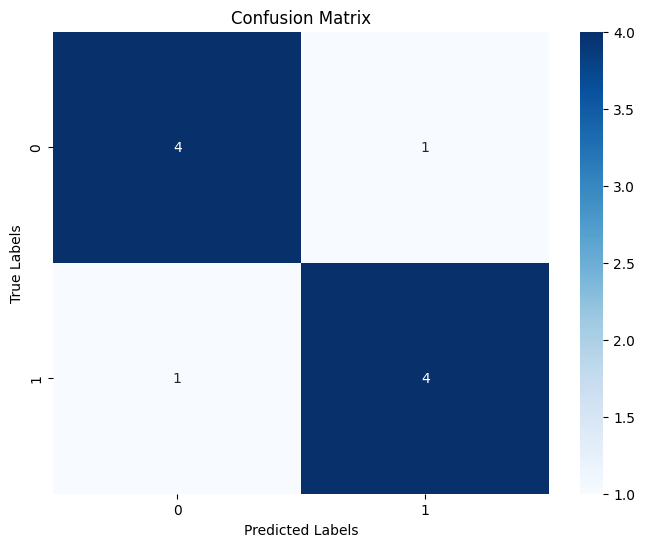

In [ ]:
c_matrix = confusion_matrix(y, y_pred)
print(c_matrix)

plot_confusion_matrix(c_matrix)

In [ ]:
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



In [ ]:
report = my_classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5



## <font color='lightblue'>Multiclass Logistic Regression</font>

Sometimes also known as:
- Multinomial Logistic Regression

#### <font color='lightgreen'>Create and Fitting Multiple-Predictor Binary Logistic Regression</font>

Consider a $m \times n+1$ input **augmented data matrix** $\mathbf{X}$ for our independent variables (also known as features or predictors) and $\mathbf{y}$ for our dependent variable containing the label values:

$$
\mathbf{X} =
  \begin{bmatrix}
    1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
    1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
    \vdots & \vdots    & \vdots    & \ddots & \vdots    \\
    1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}
  \end{bmatrix}, \ \ \ \
\mathbf{y} =
  \begin{bmatrix}
    y^{(1)} \\
    y^{(2)} \\
    \vdots \\
    y^{(m)}
  \end{bmatrix}
$$
<br>

Here, $m$ represents the data size (number of points = number of observations), and the $n$ represents the data dimension (number of features).

For the binary classification problem with single position class,
each element $y^{(i)}$ in $\mathbf{y}$ typically contains the integer value of $1$ to represent the **positive class**, and $0$ otherwise.

The logistic regression aim to fit the input data ($\mathbf{X}$) to obtain the **best-fit** model parameters
$$ \mathbf{\theta} =
  \begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    \theta_2 \\
    \vdots \\
    \theta_n
  \end{bmatrix}
$$
<br>

After the model has been fitted, the prediction can be done by first computing the **logit** (also known as **log-odds**)
$$ \mathbf{z} = \mathbf{X} \mathbf{\theta} $$
<br>

Then the probability vector is given by
$$ \mathbf{p}( \mathbf{y} = 1 | \mathbf{X} ) = \frac{1}{1+e^{-\mathbf{z}}} $$
<br>

The predicted label vector is then computed as
$$
\mathbf{\hat{y}} = 1 \left( \frac{1}{1+e^{-\mathbf{z} }} \geq 0.5 \right)
$$
<br>

For **Multiclass Logistic Regression**, each element $y^{(i)}$ in $\mathbf{y}$ can contain the integer value of $0, 1, 2, \ldots, K-1$ that represents the class labels of data point $i$. $K$ is the number of classes.
<br>

We now define a matrix $\mathbf{\Theta}$
$$
\mathbf{\Theta} =
  \begin{bmatrix}
    \theta_{0,0} & \theta_{0,1} & \cdots & \theta_{0,K-1} \\
    \theta_{1,0} & \theta_{1,1} & \cdots & \theta_{1,K-1} \\
    \vdots       &   \vdots     & \ddots & \vdots         \\
    \theta_{n,0} & \theta_{n,1} & \cdots & \theta_{n,K-1}
  \end{bmatrix}
$$
and we define column $k$ of $\mathbf{\Theta}$
$$
\mathbf{\theta_{(k)}} =
  \begin{bmatrix}
    \theta_{0,k}  \\
    \theta_{1,k}  \\
    \vdots        \\
    \theta_{n,k}
  \end{bmatrix}
$$
representing the model parameter vector for class $k$, for $k = 0, 1, 2, \ldots, K-1$.
<br>

After the model has been fitted, the prediction can be done by first computing the **logit** (also known as **log-odds**) for each class $k$

$$ \mathbf{z_{(k)}} = \mathbf{X} \mathbf{\theta_{(k)}} $$
<br>

We further define the logit matrix $\mathbf{Z}$ as
$$ \mathbf{Z} =
  \begin{bmatrix}
    \mathbf{z_{(0)}} & \mathbf{z_{(1)}} & \mathbf{z_{(2)}} & \cdots & \mathbf{z_{(K-1)}}
  \end{bmatrix}
$$

$$ \mathbf{Z} =
  \begin{bmatrix}
    \mathbf{X} \mathbf{\theta_{(0)}} & \mathbf{X} \mathbf{\theta_{(1)}} & \mathbf{X} \mathbf{\theta_{(2)}} & \cdots & \mathbf{X} \mathbf{\theta_{(K-1)}}
  \end{bmatrix}
$$

$$ \mathbf{Z} =
  \mathbf{X}
  \begin{bmatrix}
    \mathbf{\theta_{(0)}} & \mathbf{\theta_{(1)}} & \mathbf{\theta_{(2)}} & \cdots & \mathbf{\theta_{(K-1)}}
  \end{bmatrix}
$$

$$ \mathbf{Z} =
  \begin{bmatrix}
    1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
    1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
    \vdots & \vdots    & \vdots    & \ddots & \vdots    \\
    1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}
  \end{bmatrix}
  \begin{bmatrix}
    \theta_{0,0} & \theta_{0,1} & \cdots & \theta_{0,K-1} \\
    \theta_{1,0} & \theta_{1,1} & \cdots & \theta_{1,K-1} \\
    \vdots       &   \vdots     & \ddots & \vdots         \\
    \theta_{n,0} & \theta_{n,1} & \cdots & \theta_{n,K-1}
  \end{bmatrix}
$$

$$ \mathbf{Z} =
  \mathbf{X} \mathbf{\Theta}
$$
<br>

The elements of the matrix $\mathbf{Z}$ can be broken down as given below
$$ \mathbf{Z} =
  \begin{bmatrix}
    z_{(0)}^{(1)} & z_{(1)}^{(1)} & z_{(2)}^{(1)} & \cdots & z_{(K-1)}^{(1)} \\
    z_{(0)}^{(2)} & z_{(1)}^{(2)} & z_{(2)}^{(2)} & \cdots & z_{(K-1)}^{(2)} \\
    \vdots        & \vdots        & \vdots        & \ddots & \vdots          \\
    z_{(0)}^{(m)} & z_{(1)}^{(m)} & z_{(2)}^{(m)} & \cdots & z_{(K-1)}^{(m)}
  \end{bmatrix}
$$


As for the computation of probability vector and predicted label vector for each class, there are more than one approach. We shall cover the following approaches:
- **One-Vs-Rest (OVR) Approach**
- **Softmax Approach**

### <font color='cyan'>One-Vs-Rest (OVR) Approach for Computing Prediction</font>

In the **One-Vs-Rest (OVR) Approach**, the probability vector for each class is computed in the same matter as in binary logistic regression using the logistic sigmoid function as given by
$$ \mathbf{p_{(k)}} = \mathbf{p}( \mathbf{y} = k | \mathbf{X} ) = \frac{1}{1+e^{-\mathbf{z_{(k)}}}} $$
for $k = 0, 1, 2, \ldots, K-1$.
<br>

It can be easily shown that
$$
  \mathbf{P} = \frac{1}{1 + e^{-\mathbf{X} \mathbf{\Theta}}}
$$
<br>

The elements of the matrix $\mathbf{P}$ can be broken down as given below
$$ \mathbf{P} =
  \begin{bmatrix}
    \mathbf{p_{(0)}} & \mathbf{p_{(1)}} & \mathbf{p_{(2)}} & \cdots & \mathbf{p_{(K-1)}}
  \end{bmatrix}
$$
<br>

$$ \mathbf{P} =
  \begin{bmatrix}
    p_{(0)}^{(1)} & p_{(1)}^{(1)} & p_{(2)}^{(1)} & \cdots & p_{(K-1)}^{(1)} \\
    p_{(0)}^{(2)} & p_{(1)}^{(2)} & p_{(2)}^{(2)} & \cdots & p_{(K-1)}^{(2)} \\
    \vdots        & \vdots        & \vdots        & \ddots & \vdots          \\
    p_{(0)}^{(m)} & p_{(1)}^{(m)} & p_{(2)}^{(m)} & \cdots & p_{(K-1)}^{(m)}
  \end{bmatrix}
$$
where
$$
p_{(k)}^{(i)} = p(y^{(i)} = k | x_1^{(i)}, x_2^{(i)}, \ldots, x_n^{(i)})
$$
for $i = 1, 2, ..., m$ and $k = 0, 1, ..., K - 1$ corresponds to the probability of input data point $i$ belongs to class $k$.
<br>

The new predicted probability values are the probability values normalized across all the classes as shown below
$$
 \hat{p}_{(k)}^{(i)} = \frac {p_{(k)}^{(i)}} { p_{(0)}^{(i)} + p_{(1)}^{(i)} + \ldots + p_{(K-1)}^{(i)} }
 = \frac {p_{(k)}^{(i)}} {\sum_0^{K-1} p_{(k)}^{(i)} }  
$$

The predicted label is given by
$$ \hat{y}^{(i)} = \text{arg max}_{k} \ \left( \hat{p}_{(k)}^{(i)} \right) $$
<br>
in other words, the predicted label for input data point $i$ is $k$ where the predicted probability for class $k$ is the highest among all other classes.

### <font color='cyan'>Softmax Approach for Computing Prediction</font>

In the **Softmax Approach**, we first compute a matrix $\mathbf{S}$ as below
$$
  \mathbf{S} = e^{\mathbf{Z}} = e^{\mathbf{X} \mathbf{\Theta} }
$$
<br>

The elements of the matrix $\mathbf{S}$ can be broken down as given below
$$ \mathbf{S} =
  \begin{bmatrix}
    s_{(0)}^{(1)} & s_{(1)}^{(1)} & s_{(2)}^{(1)} & \cdots & s_{(K-1)}^{(1)} \\
    s_{(0)}^{(2)} & s_{(1)}^{(2)} & s_{(2)}^{(2)} & \cdots & s_{(K-1)}^{(2)} \\
    \vdots        & \vdots        & \vdots        & \ddots & \vdots          \\
    s_{(0)}^{(m)} & s_{(1)}^{(m)} & s_{(2)}^{(m)} & \cdots & s_{(K-1)}^{(m)}
  \end{bmatrix}
$$
<br>

The new predicted probability values are the $s_{(k)}^{(i)}$ values normalized across all the classes as shown below
$$
 \hat{p}_{(k)}^{(i)} = \frac {s_{(k)}^{(i)}} { s_{(0)}^{(i)} + s_{(1)}^{(i)} + \ldots + s_{(K-1)}^{(i)} }
 = \frac {s_{(k)}^{(i)}} {\sum_0^{K-1} s_{(k)}^{(i)} }  
$$
where
$$ s_{(k)}^{(i)} = e^{z_{(k)}^{(i)}} $$
<br>

The predicted label is given by
$$ \hat{y}^{(i)} = \text{arg max}_{k} \ \left( \hat{p}_{(k)}^{(i)} \right) $$
<br>
in other words, the predicted label for input data point $i$ is $k$ where the predicted probability for class $k$ is the highest among all other classes.


## <font color='lightyellow'>One-Vs-Rest (OVR) Approach</font>


### <font color='cyan'>One-Vs-Rest (OVR) Approach for Computing Prediction</font>

In the **One-Vs-Rest (OVR) Approach**, the probability vector for each class is computed in the same matter as in binary logistic regression using the logistic sigmoid function as given by
$$ \mathbf{p_{(k)}} = \mathbf{p}( \mathbf{y} = k | \mathbf{X} ) = \frac{1}{1+e^{-\mathbf{z_{(k)}}}} $$
for $k = 0, 1, 2, \ldots, K-1$.
<br>

It can be easily shown that
$$
  \mathbf{P} = \frac{1}{1 + e^{-\mathbf{X} \mathbf{\Theta}}}
$$
<br>

The elements of the matrix $\mathbf{P}$ can be broken down as given below
$$ \mathbf{P} =
  \begin{bmatrix}
    \mathbf{p_{(0)}} & \mathbf{p_{(1)}} & \mathbf{p_{(2)}} & \cdots & \mathbf{p_{(K-1)}}
  \end{bmatrix}
$$
<br>

$$ \mathbf{P} =
  \begin{bmatrix}
    p_{(0)}^{(1)} & p_{(1)}^{(1)} & p_{(2)}^{(1)} & \cdots & p_{(K-1)}^{(1)} \\
    p_{(0)}^{(2)} & p_{(1)}^{(2)} & p_{(2)}^{(2)} & \cdots & p_{(K-1)}^{(2)} \\
    \vdots        & \vdots        & \vdots        & \ddots & \vdots          \\
    p_{(0)}^{(m)} & p_{(1)}^{(m)} & p_{(2)}^{(m)} & \cdots & p_{(K-1)}^{(m)}
  \end{bmatrix}
$$
where
$$
p_{(k)}^{(i)} = p(y^{(i)} = k | x_1^{(i)}, x_2^{(i)}, \ldots, x_n^{(i)})
$$
for $i = 1, 2, ..., m$ and $k = 0, 1, ..., K - 1$ corresponds to the probability of input data point $i$ belongs to class $k$.
<br>

The new predicted probability values are the probability values normalized across all the classes as shown below
$$
 \hat{p}_{(k)}^{(i)} = \frac {p_{(k)}^{(i)}} { p_{(0)}^{(i)} + p_{(1)}^{(i)} + \ldots + p_{(K-1)}^{(i)} }
 = \frac {p_{(k)}^{(i)}} {\sum_0^{K-1} p_{(k)}^{(i)} }  
$$

The predicted label is given by
$$ \hat{y}^{(i)} = \text{arg max}_{k} \ \left( \hat{p}_{(k)}^{(i)} \right) $$
<br>
in other words, the predicted label for input data point $i$ is $k$ where the predicted probability for class $k$ is the highest among all other classes.

### <font color='cyan'>Softmax Approach for Computing Prediction</font>

In the **Softmax Approach**, we first compute a matrix $\mathbf{S}$ as below
$$
  \mathbf{S} = e^{\mathbf{Z}} = e^{\mathbf{X} \mathbf{\Theta} }
$$
<br>

The elements of the matrix $\mathbf{S}$ can be broken down as given below
$$ \mathbf{S} =
  \begin{bmatrix}
    s_{(0)}^{(1)} & s_{(1)}^{(1)} & s_{(2)}^{(1)} & \cdots & s_{(K-1)}^{(1)} \\
    s_{(0)}^{(2)} & s_{(1)}^{(2)} & s_{(2)}^{(2)} & \cdots & s_{(K-1)}^{(2)} \\
    \vdots        & \vdots        & \vdots        & \ddots & \vdots          \\
    s_{(0)}^{(m)} & s_{(1)}^{(m)} & s_{(2)}^{(m)} & \cdots & s_{(K-1)}^{(m)}
  \end{bmatrix}
$$
<br>

The new predicted probability values are the $s_{(k)}^{(i)}$ values normalized across all the classes as shown below
$$
 \hat{p}_{(k)}^{(i)} = \frac {s_{(k)}^{(i)}} { s_{(0)}^{(i)} + s_{(1)}^{(i)} + \ldots + s_{(K-1)}^{(i)} }
 = \frac {s_{(k)}^{(i)}} {\sum_0^{K-1} s_{(k)}^{(i)} }  
$$
where
$$ s_{(k)}^{(i)} = e^{z_{(k)}^{(i)}} $$
<br>

The predicted label is given by
$$ \hat{y}^{(i)} = \text{arg max}_{k} \ \left( \hat{p}_{(k)}^{(i)} \right) $$
<br>
in other words, the predicted label for input data point $i$ is $k$ where the predicted probability for class $k$ is the highest among all other classes.


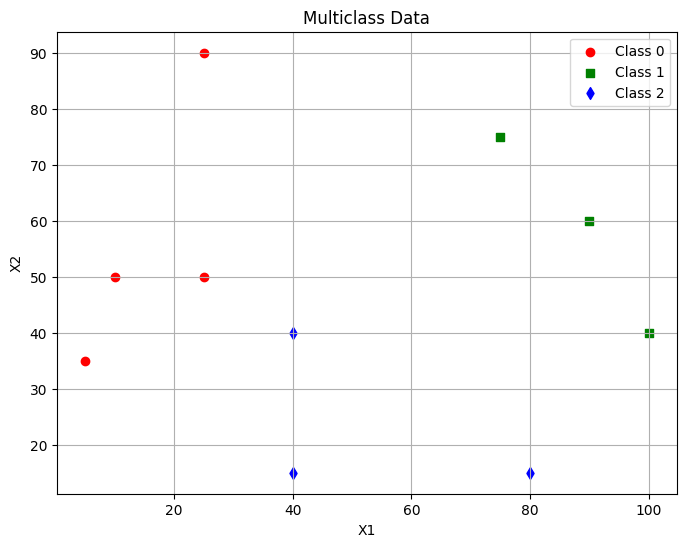

In [ ]:


X = np.array([[5, 35],
              [10, 50],
              [25, 50],
              [25, 90],
              [75, 75],
              [90, 60],
              [100, 40],
              [40, 40],
              [40, 15],
              [80, 15]])

y = np.array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2])

def plot_multiclass_data(X, y, figure_size=(8, 6)):
    plt.figure(figsize=figure_size)

    colors = ['r', 'g', 'b']
    markers = ['o', 's', 'd']

    for class_label in range(max(y) + 1):
        class_data = X[y == class_label]
        plt.scatter(class_data[:, 0], class_data[:, 1], color=colors[class_label], marker=markers[class_label],
                    label=f"Class {class_label}")

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Multiclass Data')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_multiclass_data(X, y)


#### <font color='lightgreen'>Create and Fitting the Model</font>

In [ ]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear', C = 20, random_state = 42,
                           tol = 1e-10, max_iter = 1000,
                           multi_class = "ovr"  # "auto", "ovr" or "multinomial"
                           )

print(f'Solver used = {model.solver}')
print(f'Multi-class strategy used = {model.multi_class}')

model.fit(X, y)

Solver used = liblinear
Multi-class strategy used = ovr


LogisticRegression(C=20, max_iter=1000, multi_class='ovr', random_state=42,
                   solver='liblinear', tol=1e-10)

In [ ]:
mean_accuracy = model.score(X, y)
print(f"mean_accuracy = {mean_accuracy}")

print(f"y = {y}")

y_pred = model.predict(X)
print(f"y_pred = {y_pred}")

mean_accuracy_eq = np.sum(y == y_pred) / len(y)
print(mean_accuracy_eq)

mean_accuracy = 0.8
y = [0 0 0 0 0 1 1 1 1 1]
y_pred = [0 0 0 1 0 0 1 1 1 1]
0.8


In [ ]:
print(f"n_iter_ = {model.n_iter_}")
print(f"intercept_ = {model.intercept_}")
print(f"coefficient_ = {model.coef_}")

print(model.classes_)

p_pred = model.predict_proba(X)
print(p_pred)

n_iter_ = [13]
intercept_ = [-3.93329741]
coefficient_ = [[ 0.10399613 -0.01006136]]
[0 1]
[[0.97736725 0.02263275]
 [0.96759197 0.03240803]
 [0.86252976 0.13747024]
 [0.48110212 0.51889788]
 [0.90369021 0.09630979]
 [0.54386358 0.45613642]
 [0.0426227  0.9573773 ]
 [0.01426649 0.98573351]
 [0.00798104 0.99201896]
 [0.00232001 0.99767999]]


In [ ]:
# Compute probability using equation
num_classes = model.coef_.shape[0] if len(model.coef_.shape) > 1 else 1
p_values = np.empty((X.shape[0], num_classes))

for i in range(num_classes):
    if num_classes == 1:
        logit_value = model.intercept_ + np.sum(model.coef_ * X, axis=1).reshape((-1, 1))
    else:
        logit_value = model.intercept_[i] + np.sum(model.coef_[i] * X, axis=1).reshape((-1, 1))
    p_value = 1 / (1 + np.exp(-logit_value))  # Logistic regression surface
    p_values[:, i] = p_value.ravel()

print(p_values)  # This is one-over-rest probability

# Normalize the values
p_values_sum = np.sum(p_values, axis=1).reshape(-1, 1)
print(p_values_sum)
p_pred_eq = p_values / p_values_sum
print(p_pred_eq)

print(np.abs(p_pred - p_pred_eq) < 0.0000001)


[[0.02263275]
 [0.03240803]
 [0.13747024]
 [0.51889788]
 [0.09630979]
 [0.45613642]
 [0.9573773 ]
 [0.98573351]
 [0.99201896]
 [0.99767999]]
[[0.02263275]
 [0.03240803]
 [0.13747024]
 [0.51889788]
 [0.09630979]
 [0.45613642]
 [0.9573773 ]
 [0.98573351]
 [0.99201896]
 [0.99767999]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]]


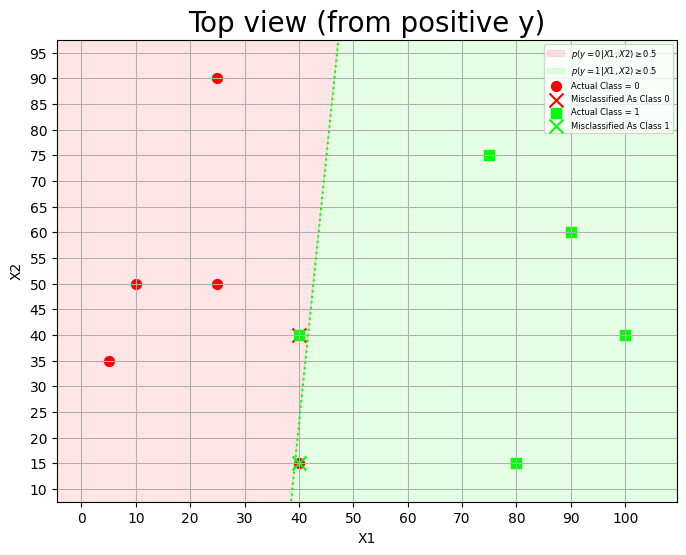

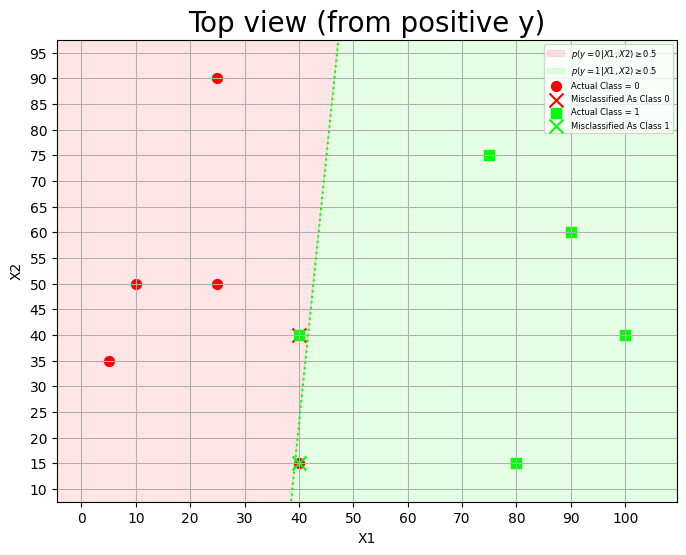

In [ ]:
plot_logistic_regression_top_view(X, y, model, plot_classes_all_points=False)
print()
plot_logistic_regression_top_view(X, y, model, plot_logit_region=False)

[[35 30]
 [40 70]
 [70 50]
 [60 35]
 [60 75]]
[0 0 1 1 1]


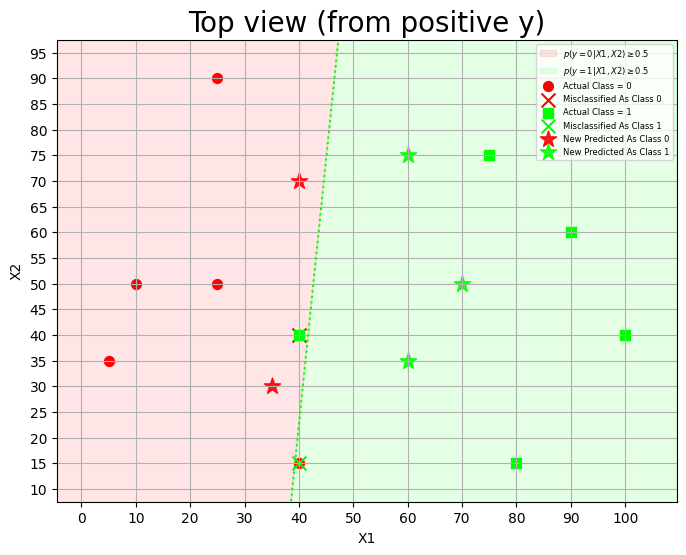

In [ ]:
X_new = np.array( [ [ 35, 30],
                    [ 40, 70],
                    [ 70, 50],
                    [ 60, 35],
                    [ 60, 75]
                  ] )
print(X_new)

y_pred_new = model.predict(X_new)
print(y_pred_new)

plot_logistic_regression_top_view(X, y, model, X_new = X_new,
                                  plot_logit_region=False)


## <font color='lightyellow'>Multinomial Approach Using Softmax</font>

In [ ]:
X = np.array( [ [  5, 35],
                [ 10, 50],
                [ 25, 50],
                [ 25, 90],
                [ 75, 75],
                [ 90, 60],
                [100, 40],
                [ 40, 40],
                [ 40, 15],
                [ 80, 15]
              ] )

y = np.array( [0, 0, 0, 0, 1, 1, 1, 2, 2, 2] )

print(X)
print(y)
print(X.shape)
print(y.shape)

[[  5  35]
 [ 10  50]
 [ 25  50]
 [ 25  90]
 [ 75  75]
 [ 90  60]
 [100  40]
 [ 40  40]
 [ 40  15]
 [ 80  15]]
[0 0 0 0 1 1 1 2 2 2]
(10, 2)
(10,)


In [ ]:
model = LogisticRegression(C = 20, random_state = 42,
                           tol = 1e-10, max_iter = 1000,
                           multi_class = "multinomial"  # "auto", "ovr" or "multinomial"
                           )

print(f'Solver used = {model.solver}')
print(f'Multi-class strategy used = {model.multi_class}')

model.fit(X, y)

Solver used = lbfgs
Multi-class strategy used = multinomial


LogisticRegression(C=20, max_iter=1000, multi_class='multinomial',
                   random_state=42, tol=1e-10)

In [ ]:
mean_accuracy = model.score(X, y)
print(f"mean_accuracy = {mean_accuracy}")

print(f"y = {y}")

y_pred = model.predict(X)
print(f"y_pred = {y_pred}")

mean_accuracy_eq = np.sum(y == y_pred) / len(y)
print(mean_accuracy_eq)

mean_accuracy = 1.0
y = [0 0 0 0 1 1 1 2 2 2]
y_pred = [0 0 0 0 1 1 1 2 2 2]
1.0


In [ ]:
print(f"n_iter_ = {model.n_iter_}")
print(f"intercept_ = {model.intercept_}")
print(f"coefficient_ = {model.coef_}")

print(model.classes_)

p_pred = model.predict_proba(X)
print(p_pred)

n_iter_ = [79]
intercept_ = [  7.05761539 -21.77235916  14.71474377]
coefficient_ = [[-0.43993992  0.22274425]
 [ 0.35445779  0.10526999]
 [ 0.08548213 -0.32801425]]
[0 1 2]
[[9.99875653e-01 2.62189365e-13 1.24347178e-04]
 [9.99999556e-01 2.39004052e-12 4.44384195e-07]
 [9.98824565e-01 3.57217566e-07 1.17507750e-03]
 [9.99999997e-01 3.25616726e-09 3.18362750e-13]
 [2.96407919e-10 9.99999906e-01 9.37729732e-08]
 [3.40075149e-16 9.99998897e-01 1.10268615e-06]
 [1.15078170e-20 9.99565913e-01 4.34086712e-04]
 [1.30025166e-03 2.25264817e-04 9.98474484e-01]
 [1.36428794e-09 4.45689644e-09 9.99999994e-01]
 [1.01694855e-18 2.09665599e-04 9.99790334e-01]]


In [ ]:
# Compute probability using equation - Using Softmax Method

logit_values = np.empty((X.shape[0], 0))
for i in range(3):  # There are 3 logit planes
  # We need to sum up over the 2 features using np.sum()
  logit_value = model.intercept_[i] + np.sum(model.coef_[i] * X, axis = 1).reshape((-1, 1))
  # NOT USING THIS: p = 1 / (1 + np.exp(-logit)) # Logistic regression surface
  logit_values = np.append(logit_values, logit_value, axis = 1)
print(logit_values)

# Below is Softmax Method
e_values = np.exp(logit_values)

# Normalize the values
e_values_sum = np.sum(e_values, axis = 1).reshape(-1, 1)
print(e_values_sum)
p_pred_eq = e_values / e_values_sum
print(p_pred_eq)

print(np.abs(p_pred - p_pred_eq) < 0.0000001)

[[ 12.65396459 -16.31562045   3.66165586]
 [ 13.79542875 -12.9642816   -0.83114715]
 [  7.19632991  -7.64741477   0.45108486]
 [ 16.10609998  -3.43661503 -12.66948495]
 [ -9.23205992  12.70722449  -3.47516457]
 [-19.17232254  16.44504141   2.72728112]
 [-28.0266068   17.88421943  10.14238736]
 [ -1.63021145  -3.38324788   5.01345932]
 [ -7.19881774  -6.01499772  13.21381546]
 [-24.79641464   8.16331382  16.63310082]]
[[3.13040840e+05]
 [9.80118924e+05]
 [1.33609444e+03]
 [9.88075997e+06]
 [3.30124318e+05]
 [1.38672779e+07]
 [5.85068039e+07]
 [1.50654028e+02]
 [5.47882136e+05]
 [1.67399813e+07]]
[[9.99875653e-01 2.62189365e-13 1.24347178e-04]
 [9.99999556e-01 2.39004052e-12 4.44384195e-07]
 [9.98824565e-01 3.57217566e-07 1.17507750e-03]
 [9.99999997e-01 3.25616726e-09 3.18362750e-13]
 [2.96407919e-10 9.99999906e-01 9.37729732e-08]
 [3.40075149e-16 9.99998897e-01 1.10268615e-06]
 [1.15078170e-20 9.99565913e-01 4.34086712e-04]
 [1.30025166e-03 2.25264817e-04 9.98474484e-01]
 [1.36428794e-

## <font color='lightblue'>Real World Logistic Regression Application:  Credit Risk Assessment</font>

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.datasets import load_digits

# Load digits dataset
X, y = load_digits(return_X_y=True)

print(X)
print(y)
print(X.shape)
print(y.shape)


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
(1797, 64)
(1797,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0)

print(X_train)
print(X_test)
print(y_train)
print(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

[[ 0.  0.  0. ... 16. 16.  6.]
 [ 0.  3. 12. ... 16.  2.  0.]
 [ 0.  1. 10. ...  0.  0.  0.]
 ...
 [ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  4. ...  0.  0.  0.]
 [ 0.  0.  6. ... 11.  0.  0.]]
[[ 0.  0. 11. ... 13. 16.  8.]
 [ 0.  1. 15. ...  1.  0.  0.]
 [ 0.  2. 13. ... 16. 16.  3.]
 ...
 [ 0.  1.  9. ...  4.  0.  0.]
 [ 0.  0.  0. ... 15.  2.  0.]
 [ 0.  0.  0. ... 12.  0.  0.]]
[6 5 3 ... 7 7 8]
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 5 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

print("X_train.shape =", X_train.shape)

X_test = scaler.transform(X_test)
print("X_test.shape =", X_test.shape)

X_train.shape = (1437, 64)
X_test.shape = (360, 64)


In [ ]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)

model.fit(X_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [ ]:
print("y_train =", y_train)

y_train_pred = model.predict(X_train)
print("y_train_pred =", y_train_pred)

print("y_test =", y_test)

y_test_pred = model.predict(X_test)
print("y_test_pred =", y_test_pred)

y_train = [6 5 3 ... 7 7 8]
y_train_pred = [6 5 3 ... 7 7 8]
y_test = [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 5 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8]
y_test_pred = [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 9 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 1 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 

In [ ]:
mean_accuracy_train = model.score(X_train, y_train)
print(f"mean_accuracy_train = {mean_accuracy_train}")

mean_accuracy_test = model.score(X_test, y_test)
print(f"mean_accuracy_test = {mean_accuracy_test}")

mean_accuracy_train_eq = np.sum(y_train == y_train_pred) / len(y_train)
print(mean_accuracy_train_eq)

mean_accuracy_test_eq = np.sum(y_test == y_test_pred) / len(y_test)
print(mean_accuracy_test_eq)

mean_accuracy_train = 0.964509394572025
mean_accuracy_test = 0.9416666666666667
0.964509394572025
0.9416666666666667


[[27  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  1  0  1  1]
 [ 1  1 33  1  0  0  0  0  0  0]
 [ 0  0  1 28  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  2  1  2  0  0  0  1 33  0]
 [ 0  0  0  1  0  1  0  2  1 36]]


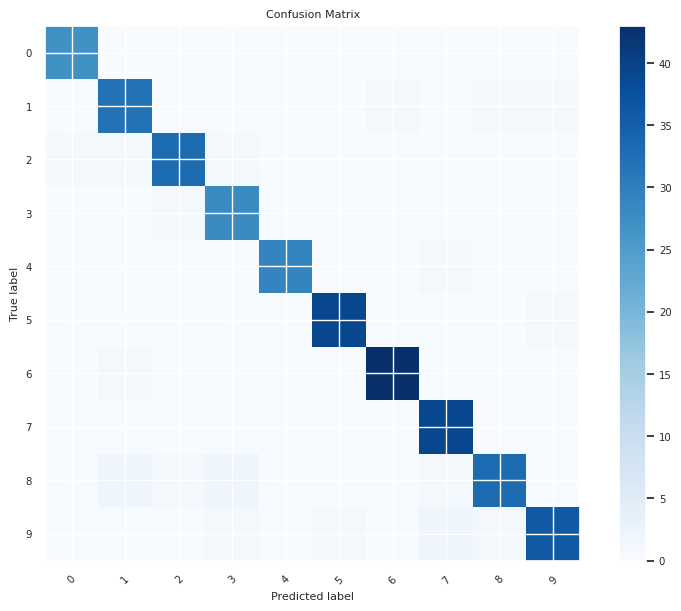

In [ ]:
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.Blues, font_size=10):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=font_size / 15)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(cm))
    plt.xticks(tick_marks, rotation=45)
    plt.yticks(tick_marks)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Example usage:
c_matrix = confusion_matrix(y_test, y_test_pred)
print(c_matrix)

plot_confusion_matrix(c_matrix, title='Confusion Matrix')
plt.show()

In [ ]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



In [ ]:
report = my_classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41



## <font color='lightblue'>Real World Logistic Regression Application: Employee Turnover</font>


In [136]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [170]:
# Load dataset
dataset = pd.read_csv("turnover.csv")

# Display the first few rows of the DataFrame
print(dataset.head())

# Define feature columns
feature_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
                'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

In [181]:
# Define feature columns
feature_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
                'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales', 'salary']
# Split dataset into features and target variable
X = dataset[feature_cols]  # Features
y = dataset['left']  # Target variable

In [190]:
# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [178]:
# Identify columns with string values
columns_with_strings = X_train.select_dtypes(include=['object']).columns

# Drop columns with string values from both training and test sets
X_train_numeric = X_train.drop(columns=columns_with_strings)
X_test_numeric = X_test.drop(columns=columns_with_strings)

# Instantiate the model
model = LogisticRegression(random_state=16, max_iter=200)

# Fit the model to the training data
model.fit(X_train_numeric, y_train)

# Test using the test set
y_pred = model.predict(X_test_numeric)

In [184]:
# Drop 'sales' and 'salary' columns from the test set
X_test_subset = X_test.drop(columns=['sales', 'salary'])

# Predict on the updated test set
y_test_pred = model.predict(X_test_subset)

# Compute confusion matrix
c_matrix = confusion_matrix(y_test, y_test_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(c_matrix)


Confusion Matrix:
[[2620  211]
 [ 681  238]]


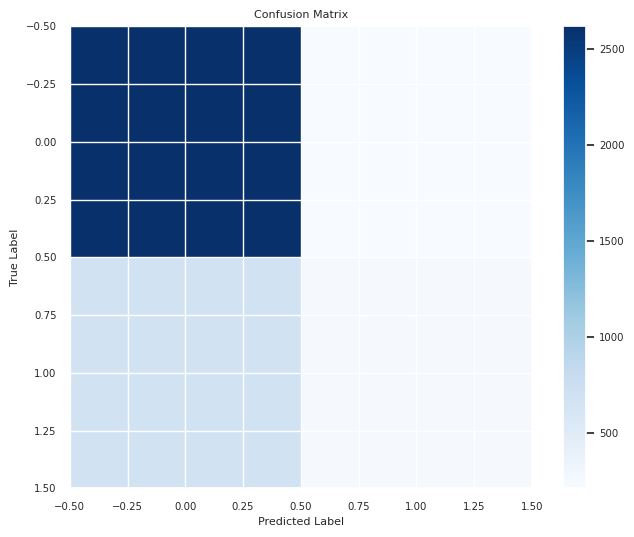

In [185]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(c_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [186]:
# Classification report
target_names = ['Class 0', 'Class 1']  # Replace with your target class names
report = classification_report(y_test, y_test_pred, target_names=target_names)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.79      0.93      0.85      2831
     Class 1       0.53      0.26      0.35       919

    accuracy                           0.76      3750
   macro avg       0.66      0.59      0.60      3750
weighted avg       0.73      0.76      0.73      3750



In [187]:
# Custom classification report
report_custom = my_classification_report(y_test, y_test_pred, target_names=target_names)  # Implement my_classification_report function
print("Custom Classification Report:")
print(report_custom)

Custom Classification Report:
         precision    recall  f1-score   support

Class 0       0.79      0.93      0.85      2831
Class 1       0.53      0.26      0.35       919



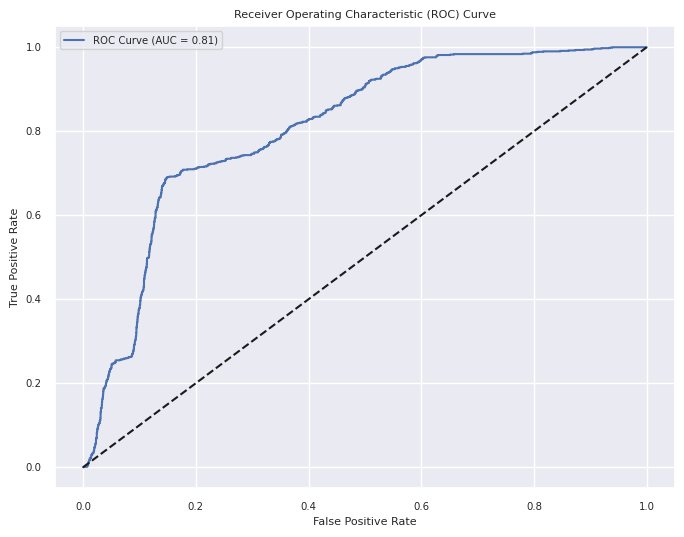

In [192]:
from sklearn.metrics import roc_auc_score

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()